# *Trabajo pŕactico organización de datos*

## 1.  Introducción

Este trabajo consiste en realizar un análisis profundo sobre un determinado set de datos para de esta manera afianzar los contenídos vistos durante el curso. 
El trabajo se dividirá en diferentes secciones para facilitar su lectura y mantener un orden a la hora de sacar conclusiones.

## 2. Importación de librerías

En esta sección se importaran las librerías cuyas herramientas utilizaremos en el trancurso de todo el trabajo.

In [377]:
#importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

## 3. Lectura de datos y primeras impresiones

### 3.1 Lectura de los datos

Se dispone de un archivo csv que nos brinda información sobre propiedades en venta en el país de Mexico. Cada línea del archivo nos da información sobre una de las propiedades. Se realiza la lectura de los datos y se muestra una vista rápida para poder familiarizarnos con la información incluída en el archivo. Se tratará a los datos como un Dataframe.

In [378]:
df = pd.read_csv('train.csv')
df.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,nan,2.00,1.00,...,"23,533.00",nan,nan,2015-08-23 00:00:00,0.00,0.00,0.00,0.00,0.00,"2,273,000.00"
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.00,3.00,2.00,...,"24,514.00",19.31,-99.23,2013-06-28 00:00:00,0.00,0.00,0.00,1.00,1.00,"3,600,000.00"
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.00,3.00,2.00,...,"48,551.00",nan,nan,2015-10-17 00:00:00,0.00,0.00,0.00,0.00,0.00,"1,200,000.00"
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.00,2.00,1.00,...,"53,666.00",19.30,-99.69,2012-03-09 00:00:00,0.00,0.00,0.00,1.00,1.00,"650,000.00"
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.00,2.00,1.00,...,"47,835.00",nan,nan,2016-06-07 00:00:00,0.00,0.00,0.00,0.00,0.00,"1,150,000.00"


### 3.2 Dimensiones del Dataframe

In [379]:
dimensiones= df.shape
print("Cantidad de filas:", dimensiones[0])
print("Cantidad de columnas:", dimensiones[1])
print("Tamaño del Dataframe:", df.size)

Cantidad de filas: 240000
Cantidad de columnas: 23
Tamaño del Dataframe: 5520000


### 3.3 Caracterísitcas principales del Dataframe

Se incluye una lista de todas las columnas con sus tipos de datos y el número de valores no nulos en cada columna. A su vez conocemos tambien los tipos de datos con los que estaremos trabjando.

In [380]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

## 3.4 Datos faltantes en el Dataframe

###  3.4.1 Datos faltantes por columna

No todo registro del Dataframe posee información en todos sus campos. Nos interesa saber la cantidad de datos faltantes en cada columna del DataFrame.

In [381]:
# Análisis de datos
columnas = df.columns
aux = df.count()
cant_filas = df.shape[0]
resultados = {}
for columna in columnas:
    cant_nulos = cant_filas-aux[columna]
    resultados[columna]=[cant_filas,aux[columna],cant_nulos,(cant_nulos*100)/cant_filas, cant_filas>aux[columna]]
df_resultados = pd.DataFrame(resultados).transpose()
df_resultados.columns=['totales','no nulos','nulos','porcentaje nulos', '¿Contiene nulos?']
df_resultados.sort_values('porcentaje nulos',ascending=False,inplace=True)
df_resultados.head(20)

,totales,no nulos,nulos,porcentaje nulos,¿Contiene nulos?
lng,240000,116512,123488,51.45,True
lat,240000,116512,123488,51.45,True
direccion,240000,186928,53072,22.11,True
metrostotales,240000,188533,51467,21.44,True
antiguedad,240000,196445,43555,18.15,True
garages,240000,202235,37765,15.74,True
idzona,240000,211379,28621,11.93,True
banos,240000,213779,26221,10.93,True
habitaciones,240000,217529,22471,9.36,True
metroscubiertos,240000,222600,17400,7.25,True


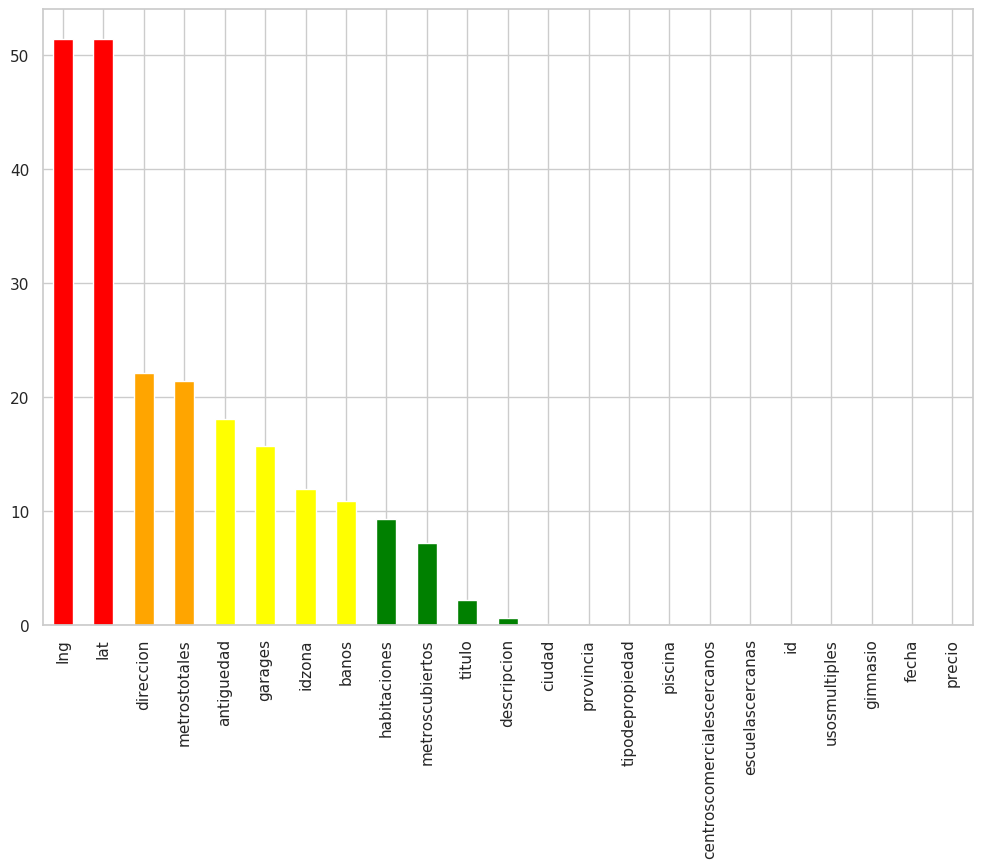

In [382]:
# Gráfico
colores=[]
for indice,fila in df_resultados.iterrows():
    if fila["porcentaje nulos"]>30:
        colores.append("red")
    if fila["porcentaje nulos"]<30 and fila["porcentaje nulos"]>20:
         colores.append("orange")
    if fila["porcentaje nulos"]<20 and fila["porcentaje nulos"]>10:
        colores.append("yellow")
    if fila["porcentaje nulos"]<10:
        colores.append("green")
grafico = df_resultados["porcentaje nulos"].plot(kind="bar",color=colores,  figsize=(12,8))

### 3.4.2 Cantidad total de datos faltantes


In [383]:
#Cálculos
cant_total=df.size
cant_nulos=df_resultados['nulos'].sum()
cant_nonulos=cant_total-cant_nulos
print("Cantidad de datos en el DataFrame: " + str(cant_total))
print("Cantidad de Nans en el DataFrame: " + str(cant_nulos))

Cantidad de datos en el DataFrame: 5520000
Cantidad de Nans en el DataFrame: 535127


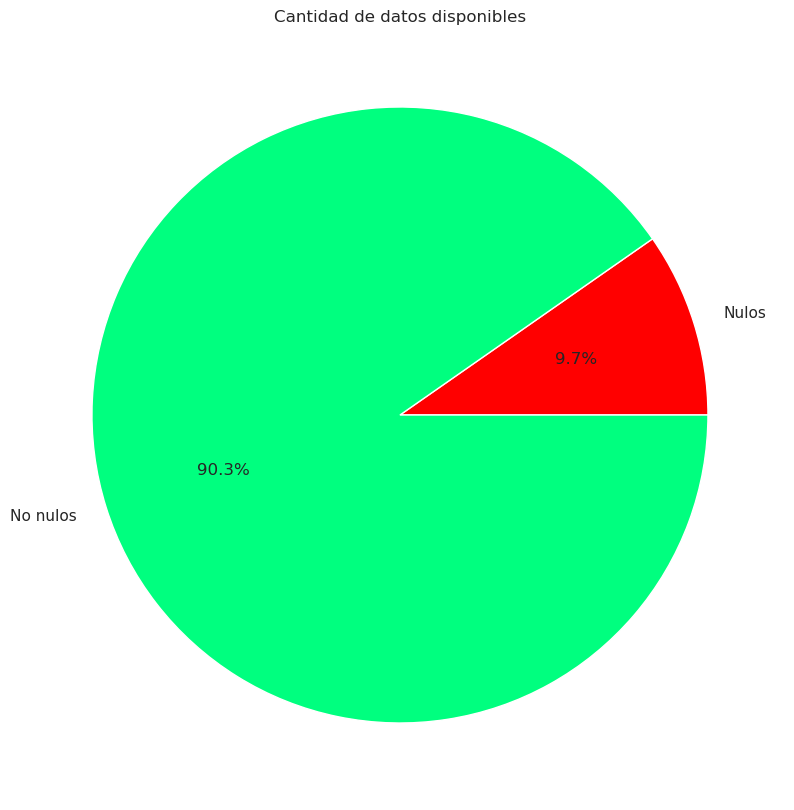

In [384]:
#Gráfico
grafico= plt.pie([cant_nulos, cant_nonulos],labels=['Nulos','No nulos'],colors=['red','springgreen'],autopct='%1.1f%%', shadow=False,pctdistance=0.6,radius=1, labeldistance=1.1)
plt.title("Cantidad de datos disponibles")
plt.show(grafico)

# 4. Análisis de Datos

En las secciones anteriores se realizó la carga de los datos y se obtuvo información general del Dataframe de manera tal de familiarizarnos con la información con la que se estará trabajando durante el trabajo práctico. A partir de ahora se comenzará con el análisis de dichos datos donde iremos explorando el DataFrame para obtener resultados que nos permitan sacar conclusiones sobre la venta de propiedades en México.

## 4.1 Cantidad de propiedades:

Es interesante conocer la cantidad de propiedades de la que disponemos. Como cada fila del Dataframe se corresponde con una propiedad, la cantidad de propiedades se corresponde con la cantidad de filas del dataframe:

In [385]:
print("Cantidad de propiedades:", dimensiones[0])

Cantidad de propiedades: 240000


## 4.2 Tipo de propiedades:

Las propiedades en venta pueden ser de diferentes tipos. A continuación se muestran cuales son los tipo de propiedadas con los que estaremos trabajando como tambien la cantidad de propiedades en venta de cada uno de ellos.

In [386]:
cantidad_por_tipo = pd.DataFrame(df['tipodepropiedad'].value_counts())
cantidad_por_tipo.columns=['cantidad']
total = cantidad_por_tipo["cantidad"].sum()
cantidad_por_tipo["pocentaje"] = (cantidad_por_tipo["cantidad"]*100)/total
cantidad_por_tipo

,cantidad,pocentaje
Casa,141717,59.06
Apartamento,57341,23.90
Casa en condominio,19297,8.04
Terreno,9945,4.14
Local Comercial,3055,1.27
Oficina comercial,1741,0.73
Bodega comercial,1406,0.59
Edificio,1396,0.58
Terreno comercial,1326,0.55
Casa uso de suelo,708,0.30


## 4.3 Ubicación de las propiedades

### 4.3.1 Cantidad de propiedades por provincia

Vimos que el set de datos se corresponde a propiedades en venta distribuídas en el país de México. Este país divide en provincias. Veamos cuantas propiedades hay por cada provincia:

In [387]:
pd.DataFrame(df.provincia.value_counts())

,provincia
Distrito Federal,58790
Edo. de México,41607
Jalisco,21238
Querétaro,16988
Nuevo León,15324
Puebla,10421
San luis Potosí,8447
Yucatán,7928
Morelos,7337
Veracruz,5762


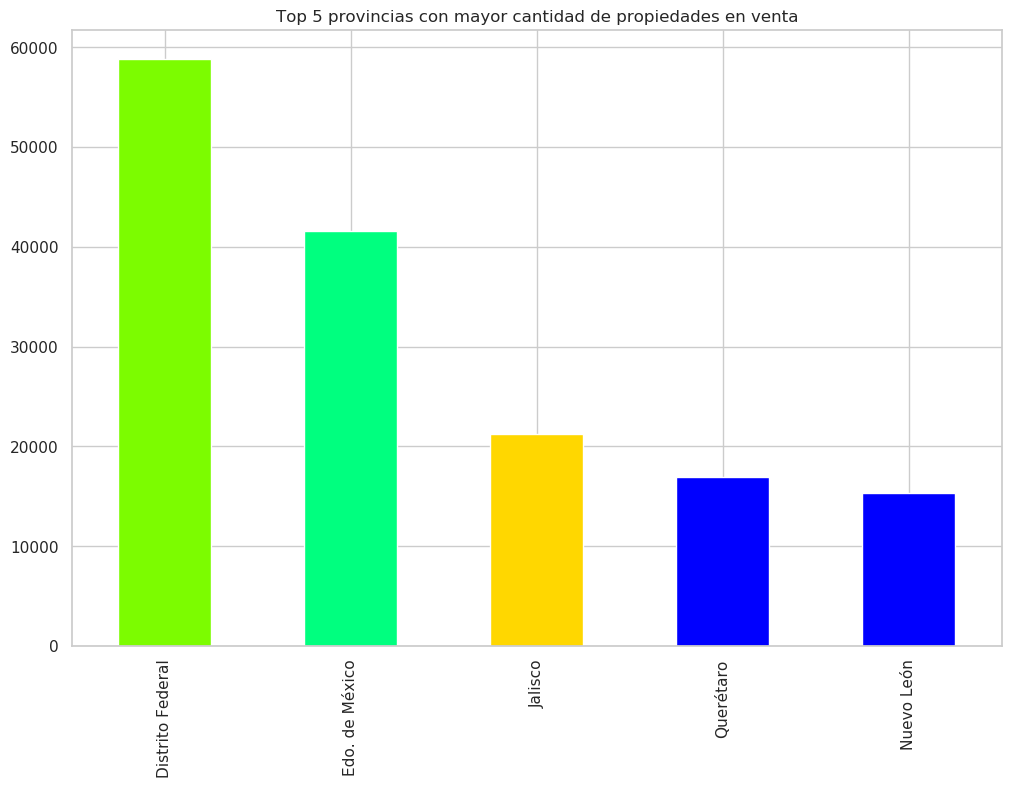

In [388]:
grafico = df.provincia.value_counts().head(5).plot(kind='bar', figsize=(12,8), rot=90, title="Top 5 provincias con mayor cantidad de propiedades en venta",colors=['lawngreen','springgreen','gold','blue','blue'],)
plt.show(grafico)

Observamos que de entre las 5 provincias con más propiedades, entre la primera y la última hay demasiada diferencia, el Distrito Federal tiene casi 3 veces más propiedades que Nuevo León.

### 4.3.2 Top 5 de ciudades con mayor cantidad de propiedades en venta

Analizamos cuales eran las provincias con mayor cantidad de propiedades, ahora veremos cuales son las 5 ciudades con más propiedades a la venta

In [389]:
grouped = df.groupby(['provincia','ciudad'])['ciudad'].agg(['size'])
grouped.columns = ['Propiedades por ciudad']

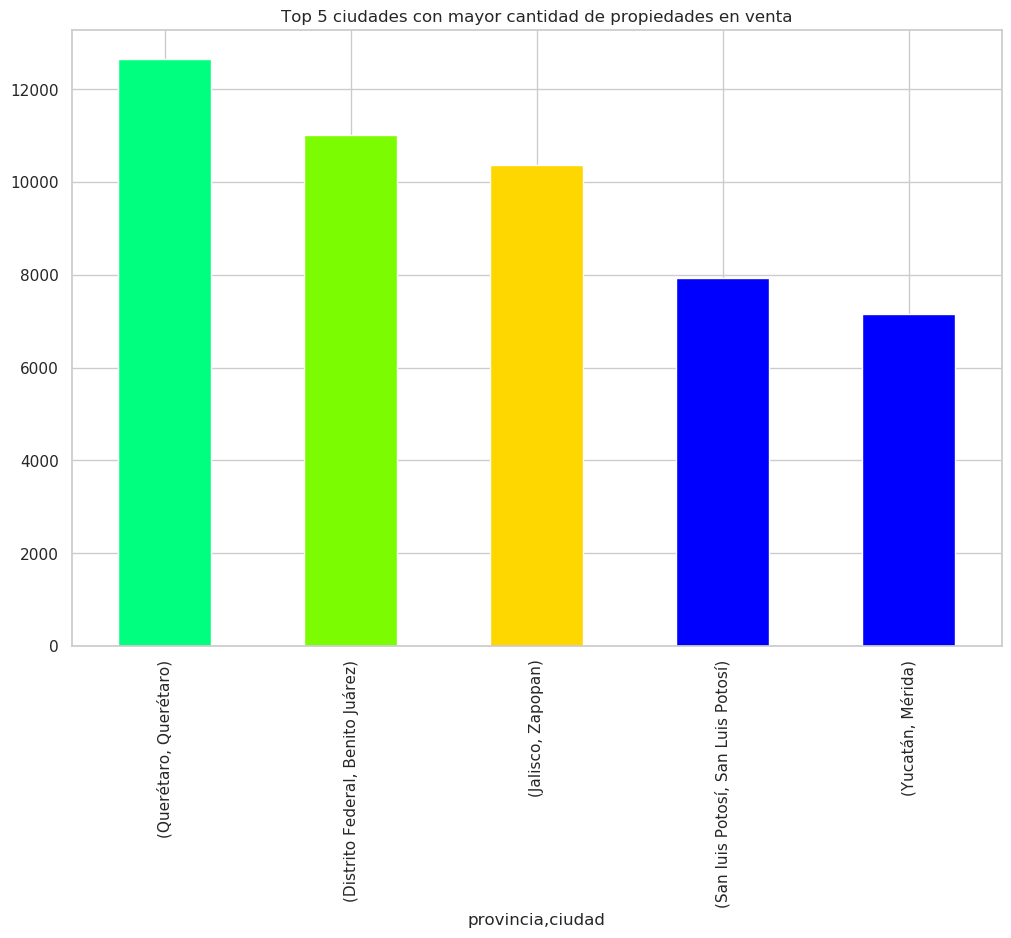

In [390]:
grafico= grouped['Propiedades por ciudad'].sort_values(ascending = False).head(5).plot(kind="bar",figsize=(12,8), rot=90,title="Top 5 ciudades con mayor cantidad de propiedades en venta",color=['springgreen','lawngreen','gold','blue','blue'])
plt.show(grafico)

**Obs** : De las 5 ciudades con más propiedades, 3 pertenecen a provincias que se encuentran en las 5 provincias con mayor propiedades.

### 4.3.3 ¿Cuáles son las provincias con mayor cantidad de algún tipo de propiedad?

Es interesante conocer cuales son las provincias que tiene mayor cantidad de propiedades de algún tipo en específico en venta. A modo de ejemplo veamos el top 3 de las provincias con mayor cantidad de casas en venta.

In [391]:
print(" Las 3 provincias con mayor cantidad de casas en venta son: ")
df.loc[df.tipodepropiedad == "Casa", : ]["provincia"].value_counts().head(3)

 Las 3 provincias con mayor cantidad de casas en venta son: 


Edo. de México      25938
Distrito Federal    15812
Jalisco             14196
Name: provincia, dtype: int64

Otro ejemplo podría ser conocer cual es la provincia con mayor cantidad de huertas en venta.

In [392]:
print(" La provincia con mayor cantidad de Huertas en venta es:")
df.loc[df.tipodepropiedad == "Huerta", :]["provincia"].value_counts().head(1)

 La provincia con mayor cantidad de Huertas en venta es:


Chihuahua    7
Name: provincia, dtype: int64

### En general:

Supongamos ahora que queremos generalizarlo y calculemos para cada tipo de propiedad cuál es la provincia que tiene mayor cantidad de propiedades en venta de cada tipo.

In [393]:
tipos = df["tipodepropiedad"].dropna().unique()
for tipo in tipos:
    print ("\nTIPO: " + tipo)
    print(df.loc[df.tipodepropiedad == tipo, :]["provincia"].value_counts().head(1))


TIPO: Apartamento
Distrito Federal    33839
Name: provincia, dtype: int64

TIPO: Casa en condominio
Edo. de México    4717
Name: provincia, dtype: int64

TIPO: Casa
Edo. de México    25938
Name: provincia, dtype: int64

TIPO: Terreno
Distrito Federal    1677
Name: provincia, dtype: int64

TIPO: Terreno comercial
San luis Potosí    234
Name: provincia, dtype: int64

TIPO: Local Comercial
Distrito Federal    471
Name: provincia, dtype: int64

TIPO: Quinta Vacacional
Nuevo León    205
Name: provincia, dtype: int64

TIPO: Oficina comercial
Distrito Federal    736
Name: provincia, dtype: int64

TIPO: Edificio
Distrito Federal    616
Name: provincia, dtype: int64

TIPO: Casa uso de suelo
Distrito Federal    277
Name: provincia, dtype: int64

TIPO: Local en centro comercial
Jalisco    54
Name: provincia, dtype: int64

TIPO: Bodega comercial
Distrito Federal    322
Name: provincia, dtype: int64

TIPO: Otros
Querétaro    34
Name: provincia, dtype: int64

TIPO: Villa
Guerrero    90
Name: provin

In [ ]:
#Faltaría un grafico y una conclusión

### 4.3.4 Antigüedad de propiedades según provincia

Queremos ver que provincia tiene en promedio las propiedades más antigüas.

In [462]:
antiguedad_por_zona = df.groupby('provincia')['antiguedad'].agg(['size','sum','mean']).round(2)
antiguedad_por_zona.columns = ['cantidad de propiedades', 'suma de las antiguedades (años)', 'antiguedad promedio (años)']
antiguedad_por_zona = antiguedad_por_zona.sort_values('antiguedad promedio (años)', ascending = False)
antiguedad_por_zona

,cantidad de propiedades,suma de las antiguedades (años),antiguedad promedio (años)
provincia,,,
Distrito Federal,58790,"630,800.00",12.19
Edo. de México,41607,"376,249.00",10.03
Guerrero,2678,"18,284.00",7.61
Nuevo León,15324,"85,133.00",7.54
Aguascalientes,1753,"11,633.00",7.52
Michoacán,2471,"12,343.00",7.06
Jalisco,21238,"119,008.00",6.64
Chihuahua,4590,"18,805.00",6.52
Morelos,7337,"37,963.00",6.46


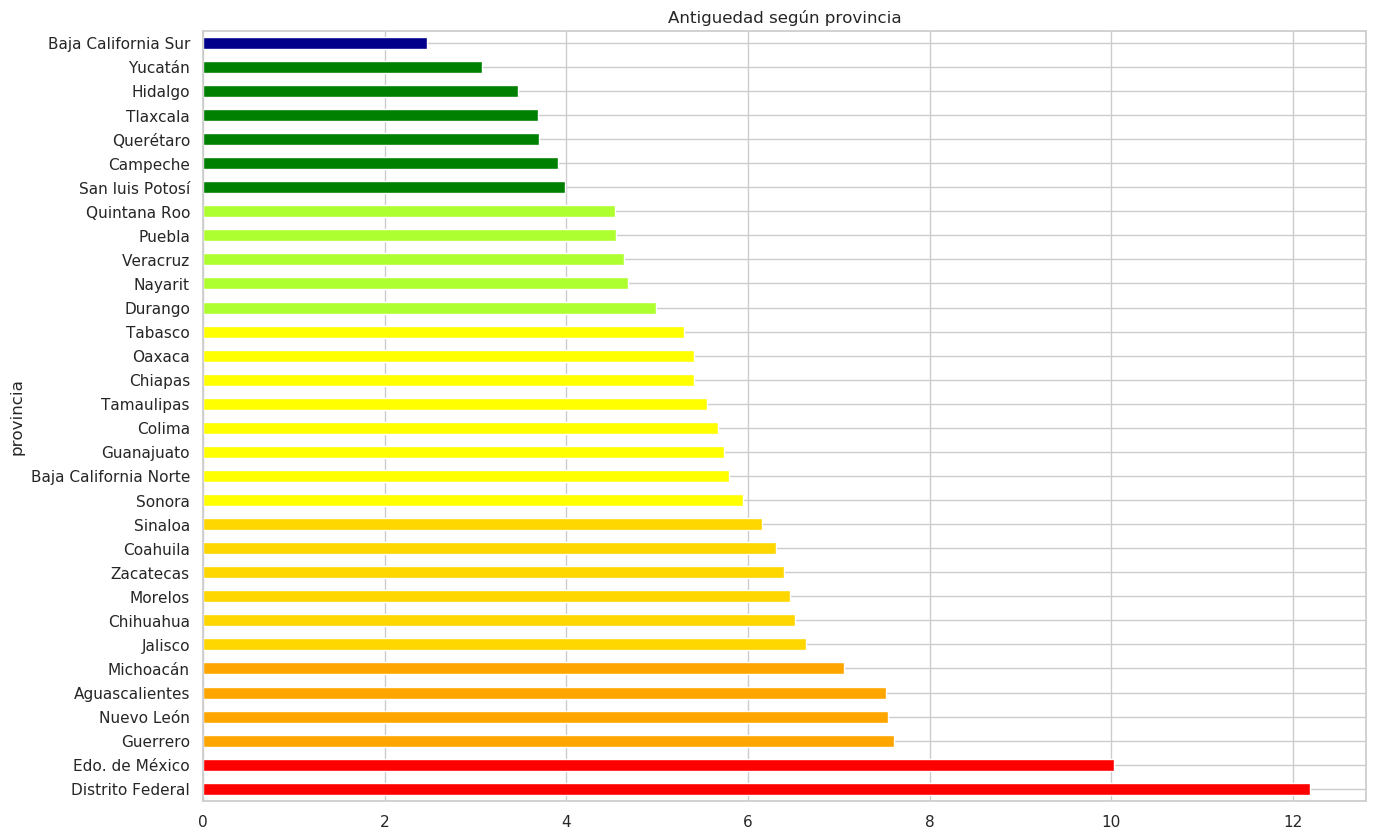

In [463]:
#Gráfico
colores=[]
for indice,fila in antiguedad_por_zona.iterrows():
    if fila['antiguedad promedio (años)']>=10:
        colores.append("red")
    if fila['antiguedad promedio (años)']<10 and fila['antiguedad promedio (años)']>=9:
         colores.append("tomato")
    if fila['antiguedad promedio (años)']<9 and fila['antiguedad promedio (años)']>=8:
        colores.append("coral")
    if fila['antiguedad promedio (años)']<8 and fila['antiguedad promedio (años)']>=7:
        colores.append("orange")
    if fila['antiguedad promedio (años)']<7 and fila['antiguedad promedio (años)']>=6:
        colores.append("gold")    
    if fila['antiguedad promedio (años)']<6 and fila['antiguedad promedio (años)']>=5:
        colores.append("yellow")  
    if fila['antiguedad promedio (años)']<5 and fila['antiguedad promedio (años)']>=4:
         colores.append("greenyellow")
    if fila['antiguedad promedio (años)']<4 and fila['antiguedad promedio (años)']>=3:
         colores.append("green") 
    if fila['antiguedad promedio (años)']<3 and fila['antiguedad promedio (años)']>=2:
        colores.append("darkblue")
    if fila['antiguedad promedio (años)']<2 and fila['antiguedad promedio (años)']>=1:
        colores.append("blue")
    if fila['antiguedad promedio (años)']<1:
        colores.append("cyan")
grafico = antiguedad_por_zona['antiguedad promedio (años)'].plot.barh(figsize=(15,10), rot=0,title="Antiguedad según provincia",color=colores)
plt.show(grafico)

Se puede observar claramente que el Distrito Federal y el Estado de México tienen en promedio una mayor antigüedad que el resto de las provincias. También se observa que Baja California Sur tiene a la venta edificios con muy poca antigüedad, practicamente nuevos.

## 4.4 Análisis de precios

En esta sección se analizará como afectan al precio de las propiedades diferentes factores. El precio de una propiedad puede variar dependiendo la ubicación, los metros que ocupa, la cantidad de habitaciones, si tiene o no piscina, etc.

### 4.4.1 Precio de propiedades según provincia

En primer lugar veremos cuanto afecta al valor de una propiedad su ubicación, para ello analizaremos el precio promedio de las propiedades según la provincia en la que se ubican.

In [396]:
precios_promedio = df.groupby('provincia')['precio'].agg(['mean','size'])
precios_promedio.columns = ['precio promedio','cant de propiedades']
precios_promedio.sort_values('precio promedio', ascending=False)

,precio promedio,cant de propiedades
provincia,,
Distrito Federal,"3,471,705.09",58790
Edo. de México,"2,762,464.91",41607
Nuevo León,"2,717,757.65",15324
Guerrero,"2,548,741.86",2678
Quintana Roo,"2,402,966.94",4756
Jalisco,"2,367,693.58",21238
Tabasco,"2,300,480.23",994
Puebla,"2,298,403.64",10421
Morelos,"2,290,088.01",7337


Una provincia se considera cara si el promedio del precio de sus propiedades es mayor a $ 2.500.000. Veamos en una gráfica las provincias más caras para comprar propiedades.

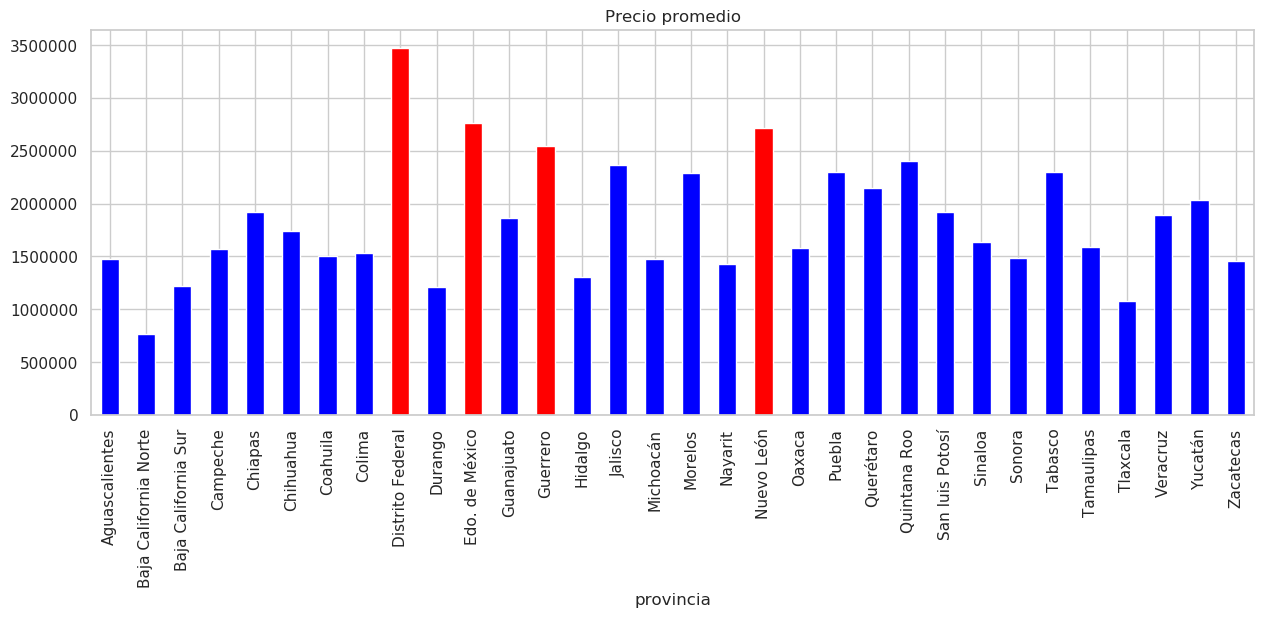

In [397]:
#gráfico
colores=[]
for indice,fila in precios_promedio.iterrows():
    if fila['precio promedio']>2500000:
        colores.append("red")
    else:
        colores.append("blue")
precios_promedio["precio promedio"].plot(kind = 'bar', figsize = (15, 5), rot = 90, title = "Precio promedio",color=colores);

Conclusión : 

### 4.4.2 Variación del precio según cantidad de habitaciones

Un factor decisivo que influye sobre el precio de las propiedades es la cantidad de las habitaciones de las que dispone. En este apartado se sacarán conclusiones sobre la influencia de este factor en los precios de las propiedades.
Para que el análisis sea eficiente se considerarán propiedades donde el resto de las caracteristicas sea similar.

Por ejemplo: Consideremos solo las con un solo garage y sin piscina. 

In [398]:
df_resultados = df.loc[df.tipodepropiedad == 'Casa',:].loc[df.garages == 1].loc[df.piscina==0]\
.groupby('habitaciones')['precio'].agg(['size','mean'])

df_resultados.columns = ['cantidad_de_propiedades','precio_promedio']
df_resultados.sort_values('precio_promedio', ascending=False)

,cantidad_de_propiedades,precio_promedio
habitaciones,,
8.00,47,"3,250,536.23"
10.00,32,"3,013,125.00"
9.00,16,"2,475,625.00"
7.00,82,"2,267,552.44"
6.00,287,"2,134,535.45"
5.00,691,"1,903,298.44"
4.00,2917,"1,847,613.37"
3.00,13455,"1,313,202.85"
2.00,11719,"677,937.53"


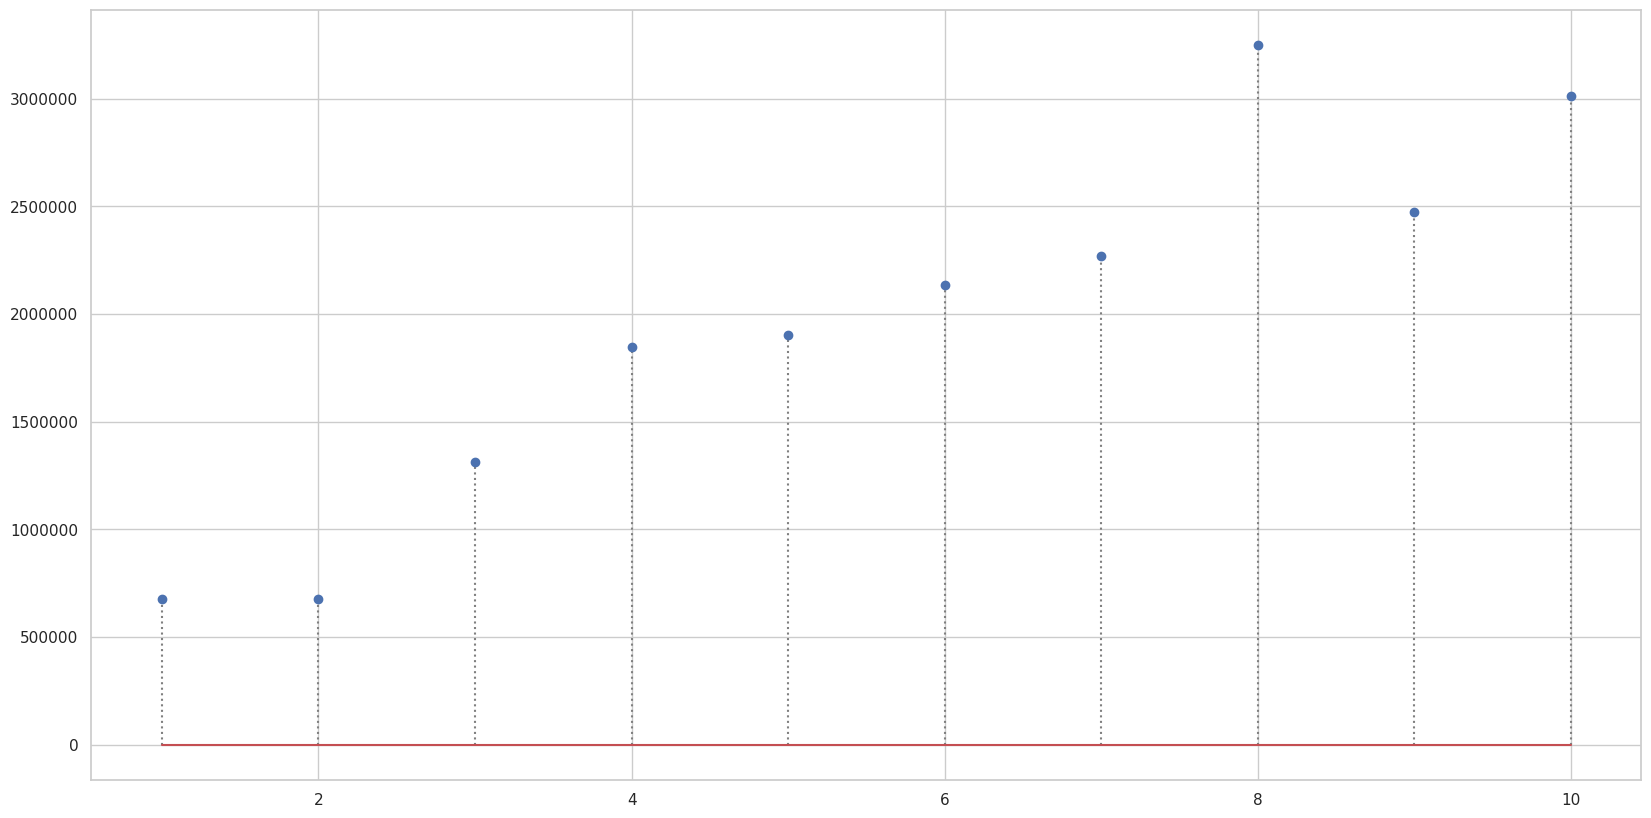

In [399]:
grafico= plt.stem(df_resultados.index,df_resultados["precio_promedio"],linefmt=("grey",":"))
plt.show(grafico)

Conclusión:

### 4.4.3 El impacto de las piscinas en el precio 

Uno de los factores para tener en cuenta a la hora de comprar una casa es si esta tiene o no piscina.
Veamos que porcentaje de casas tienen piscina sabiendo que tener piscina en una casa es un gusto y no algo fundamental.

In [400]:
df_aux1 = df.loc[df.tipodepropiedad == 'Casa',['precio','piscina']].groupby('piscina')['precio'].agg(['mean','size'])
df_aux1.columns=['precio promedio','cantidad']
total = df_aux1['cantidad'].sum()
df_aux1['porcentaje'] = ((df_aux1['cantidad']*100)/total)
df_aux1

,precio promedio,cantidad,porcentaje
piscina,,,
0.00,"2,363,569.16",132608,93.57
1.00,"2,901,694.73",9109,6.43


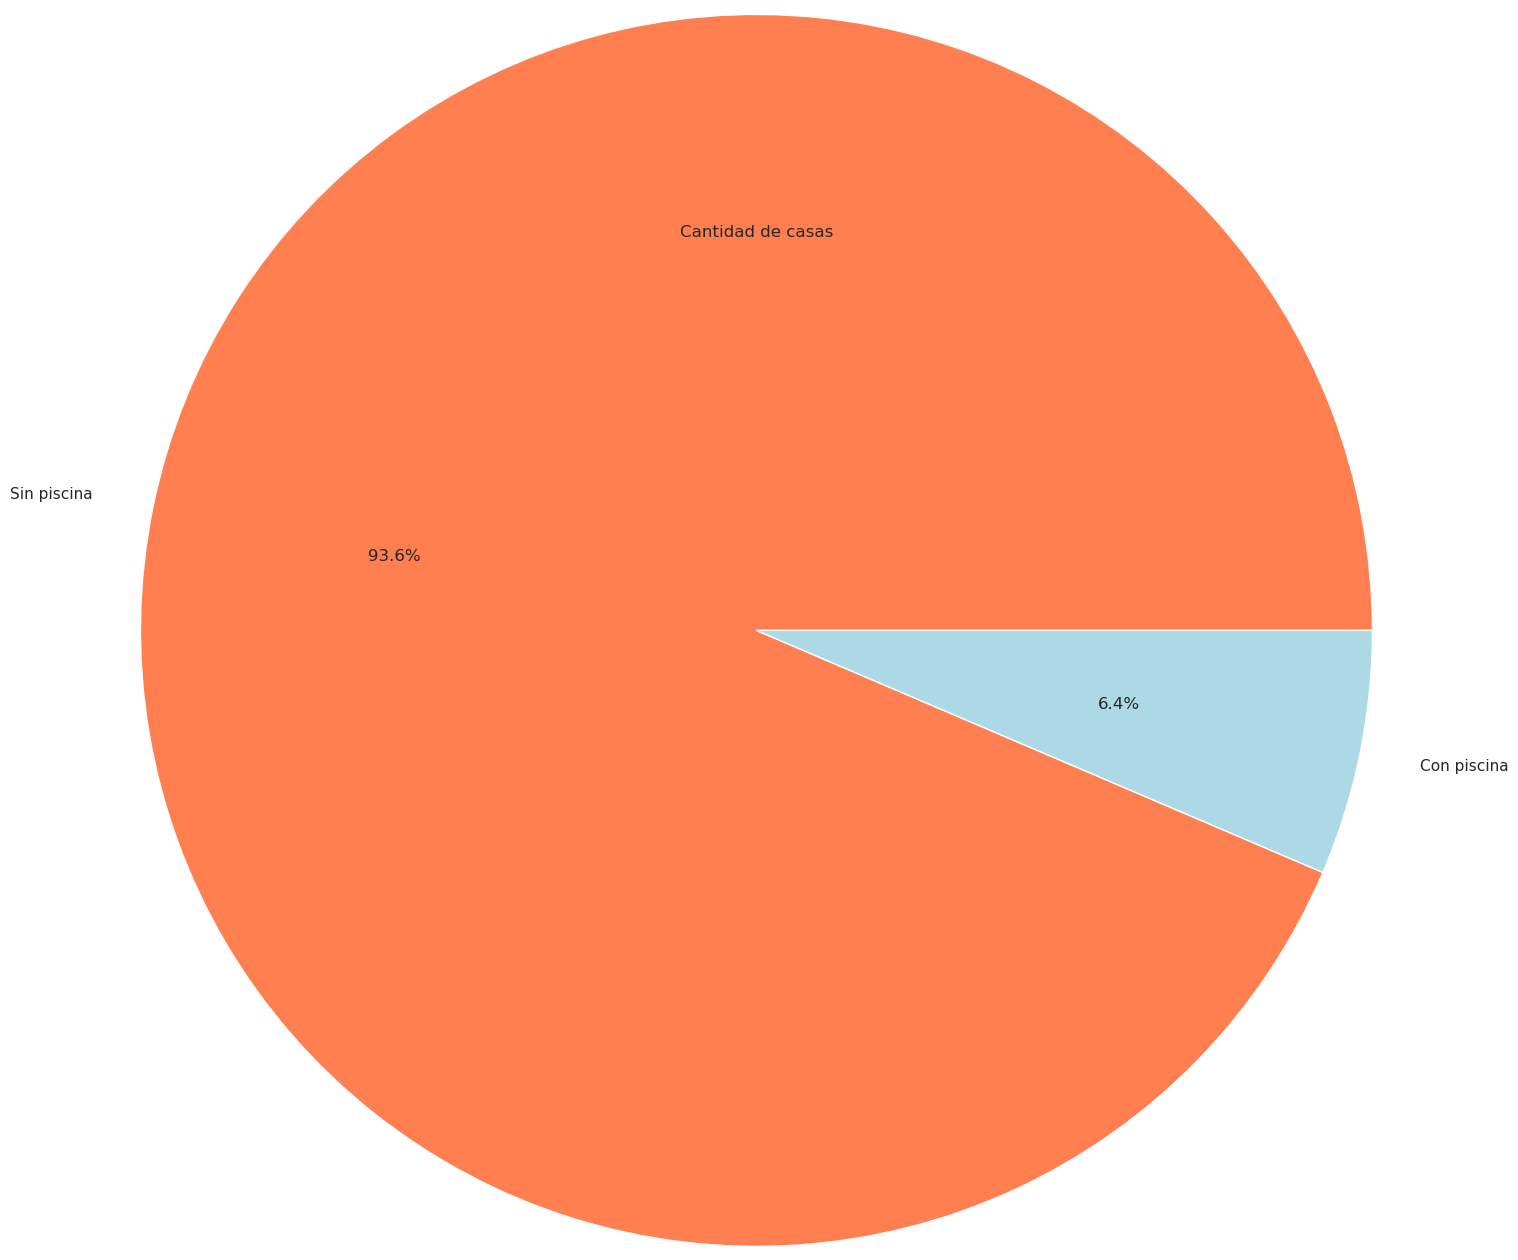

In [464]:
#Gráfico1
grafico = plt.pie(df_aux1['cantidad'],labels=['Sin piscina','Con piscina'],colors=['coral','lightblue'],autopct='%1.1f%%', shadow=False,pctdistance=0.6,radius=2, labeldistance=1.1)
plt.title("Cantidad de casas")
plt.show(grafico)

Explicación del grafico

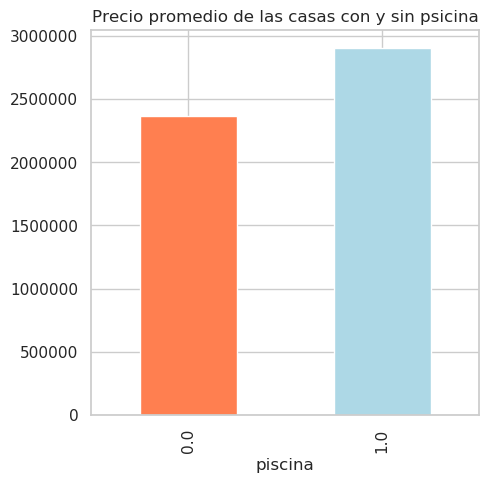

In [465]:
#Grafico 2
df_aux1["precio promedio"].plot(kind = 'bar', figsize = (5, 5), rot = 90, title = "Precio promedio de las casas con y sin psicina",color=['coral','lightblue']);

Conclusión:

Ahora veamos como impacta en el precio si se desea adquirir una Quinta Vacacional, lugar donde ya es más importante que esta cuente
con una piscina ya que es un lugar que la gente utiliza para relajarse en sus vacaciones

In [402]:
df_aux2 = df.loc[df.tipodepropiedad == 'Quinta Vacacional',['precio','piscina']].groupby('piscina')['precio'].agg(['mean','size'])
df_aux2.columns = ['precio promedio','cantidad']
total = df_aux2['cantidad'].sum()
df_aux2['porcentaje'] = ((df_aux2['cantidad']*100)/total)
df_aux2

,precio promedio,cantidad,porcentaje
piscina,,,
0.00,"2,969,686.40",279,70.63
1.00,"3,711,128.84",116,29.37


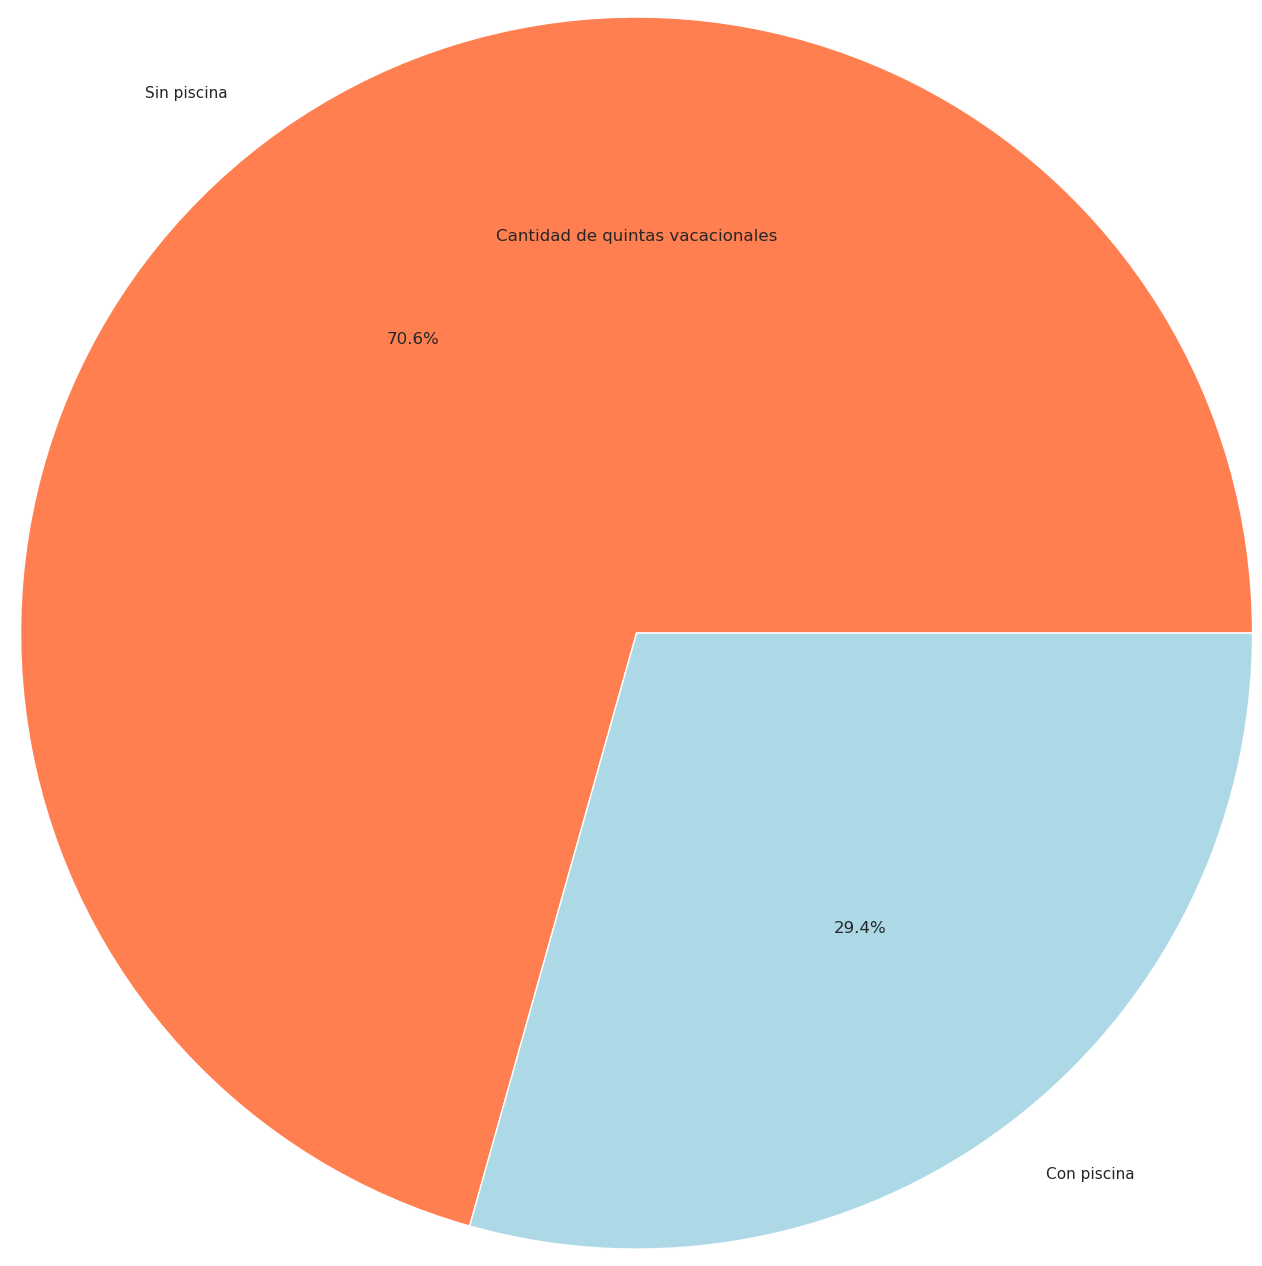

In [467]:
#Gráfico1
grafico = plt.pie(df_aux2['porcentaje'],labels=['Sin piscina','Con piscina'],colors=['coral','lightblue',],autopct='%1.1f%%', shadow=False,pctdistance=0.6,radius=2, labeldistance=1.1)
plt.title("Cantidad de quintas vacacionales")
plt.show(grafico)

Explicación del grafico

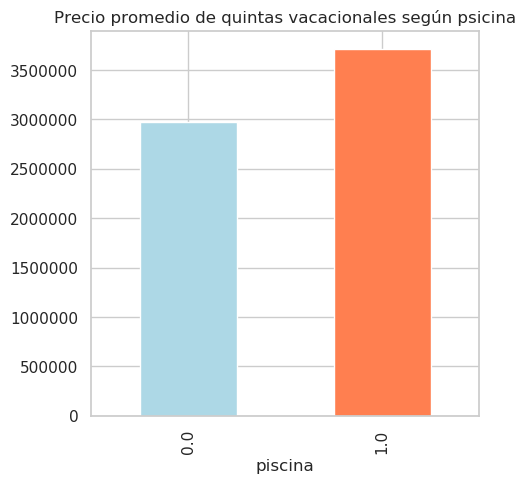

In [468]:
df_aux2["precio promedio"].plot(kind = 'bar', figsize = (5, 5), rot = 90, title = "Precio promedio de quintas vacacionales según psicina",color=['lightblue','coral']);

**Conclusion:** Tanto para las casas como para las quintas vacacionales,en general, el precio se ve incrementado si la propiedad tiene piscina. Notamos que hay una mayor proporcion de quintas vacacionales que tiene piscina con respecto a la proporcion de cantidad de casas que las tienen.

### 4.4.4  El impacto de poseer garage en el precio

Otro factor que influye sobre el precio es si la propiedad posee o no garage. En éste apartado se analizará la variación del precio de la propiedad con garage respecto a si no lo posee. Se asume que el precio de una propiedad con garage es mayor que la misma si no lo tuviera


En apartados anteriores se analizó el impacto de la ubicación de la propiedad y la cantidad de habitaciones en el precio de la propiedad. Para ampliar ésta información, el análisis de los cambios en el precio se realizarán en las propiedades agrupadas segun la provincia en la que se encuentran y en la cantidad de habitaciones que poseén.

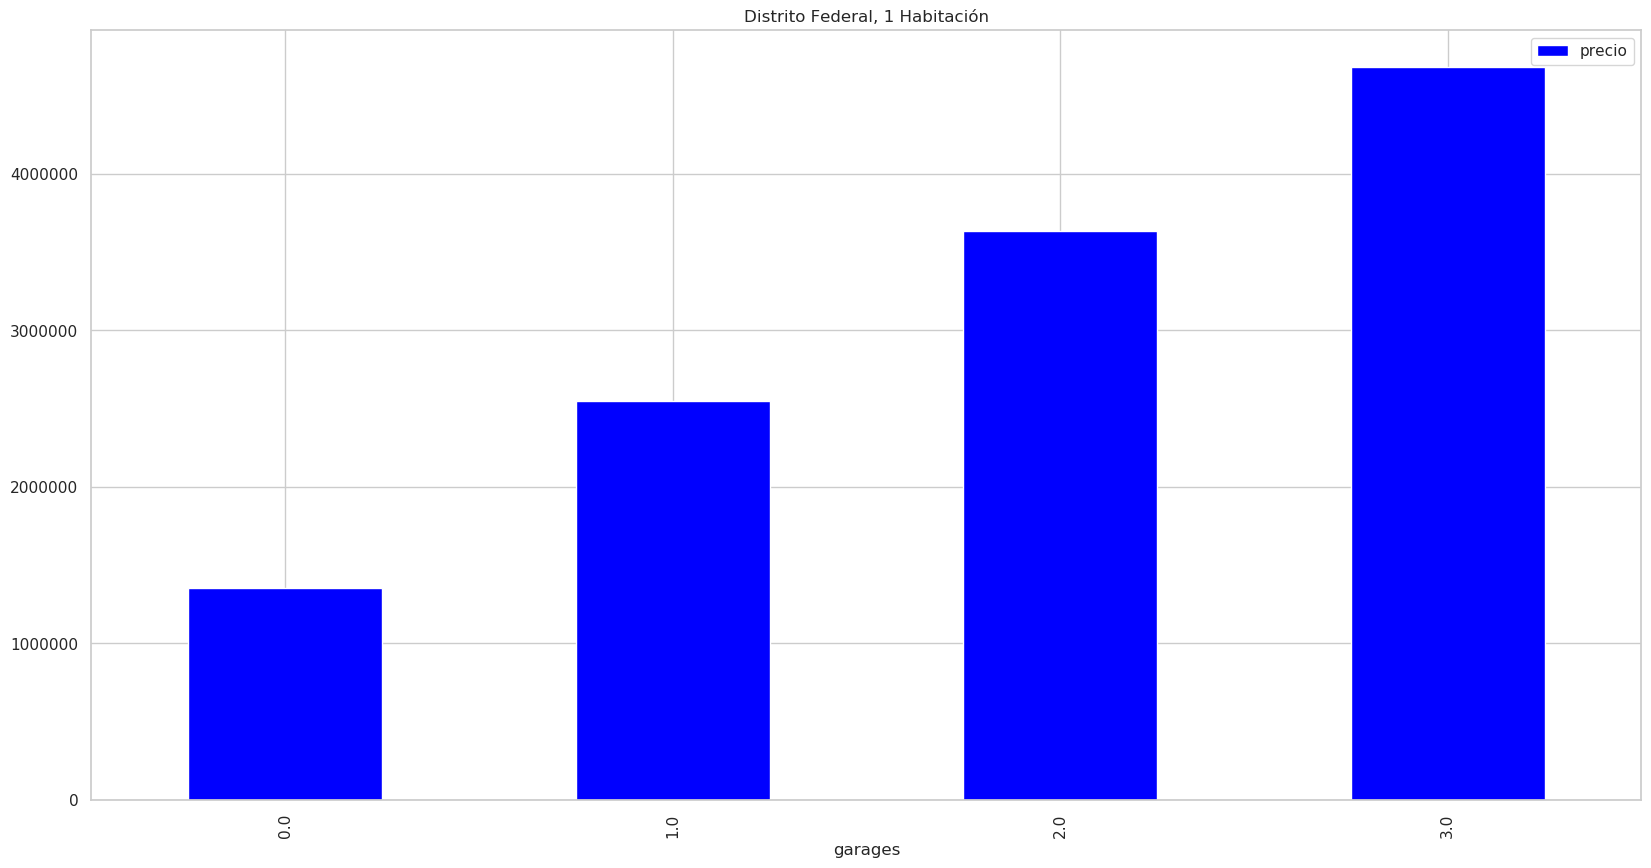

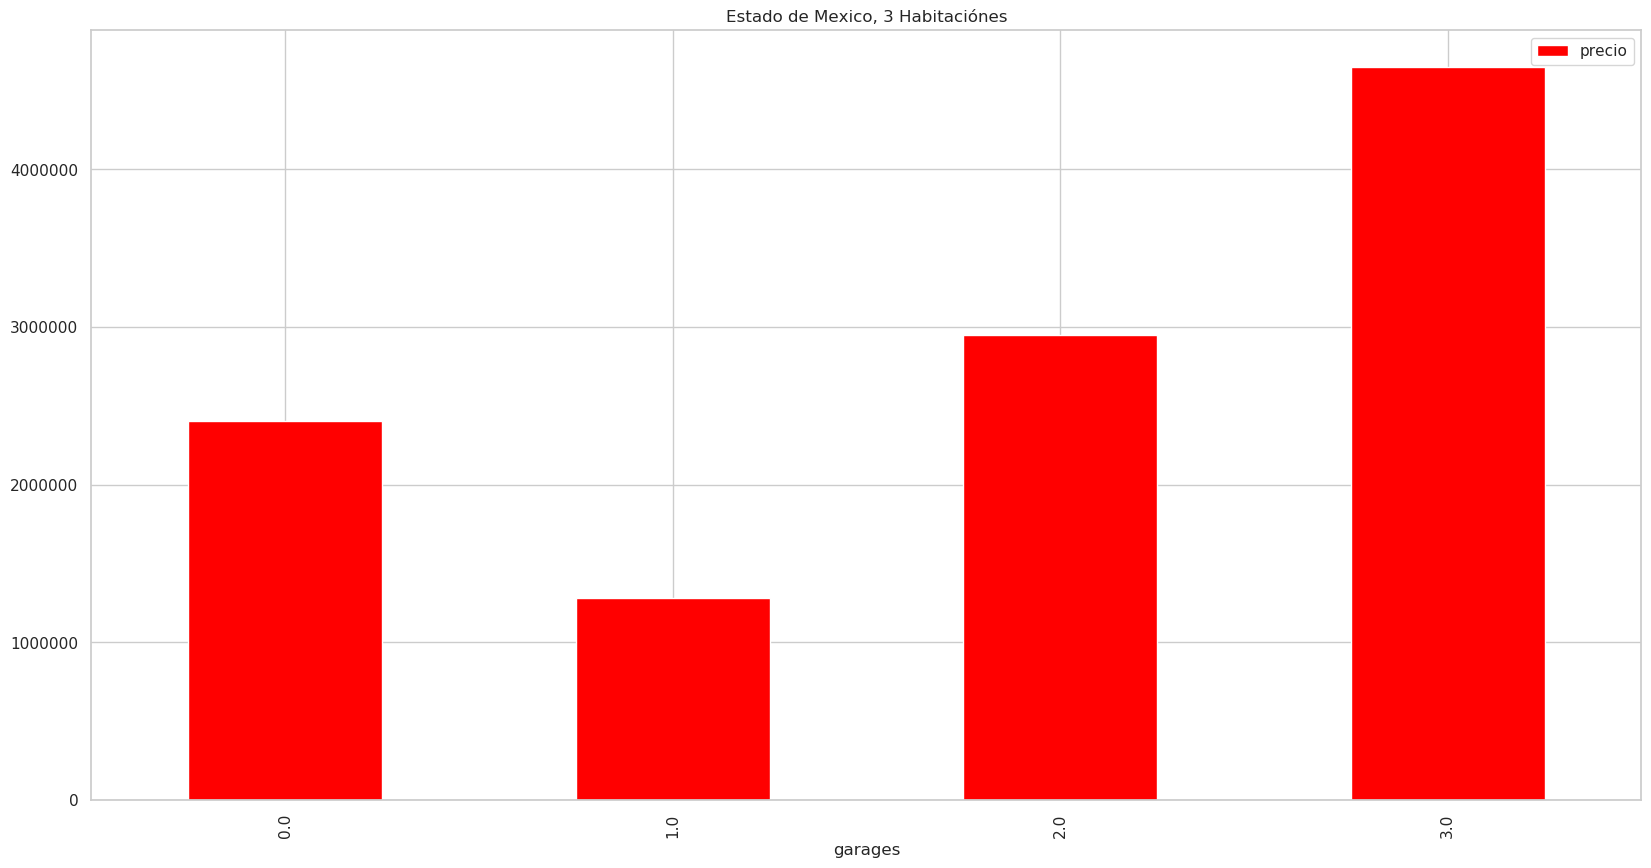

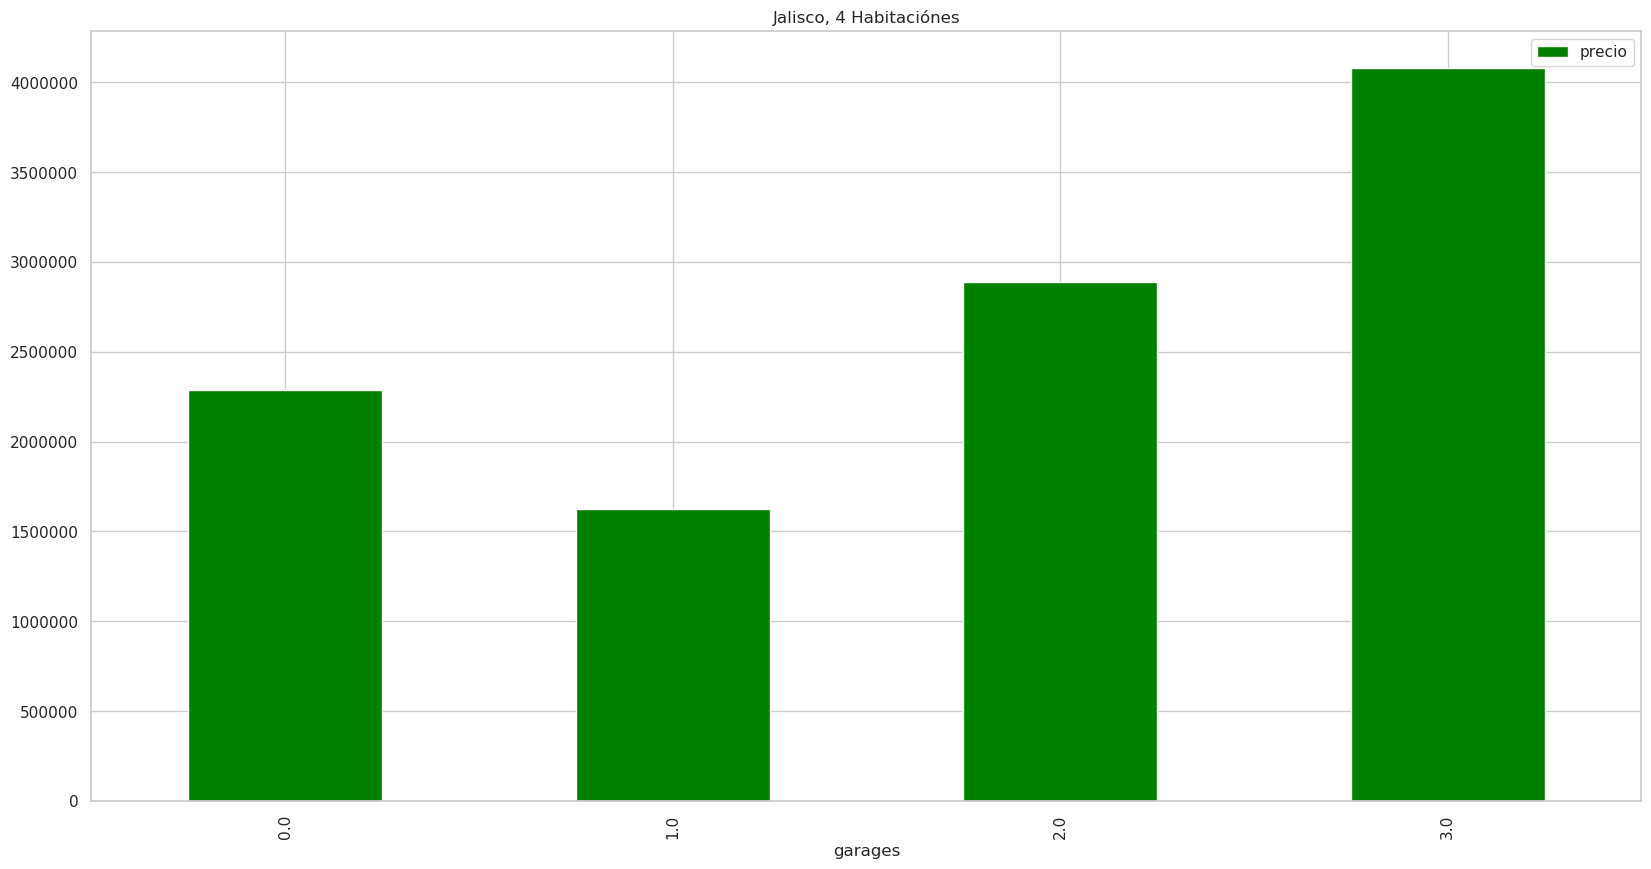

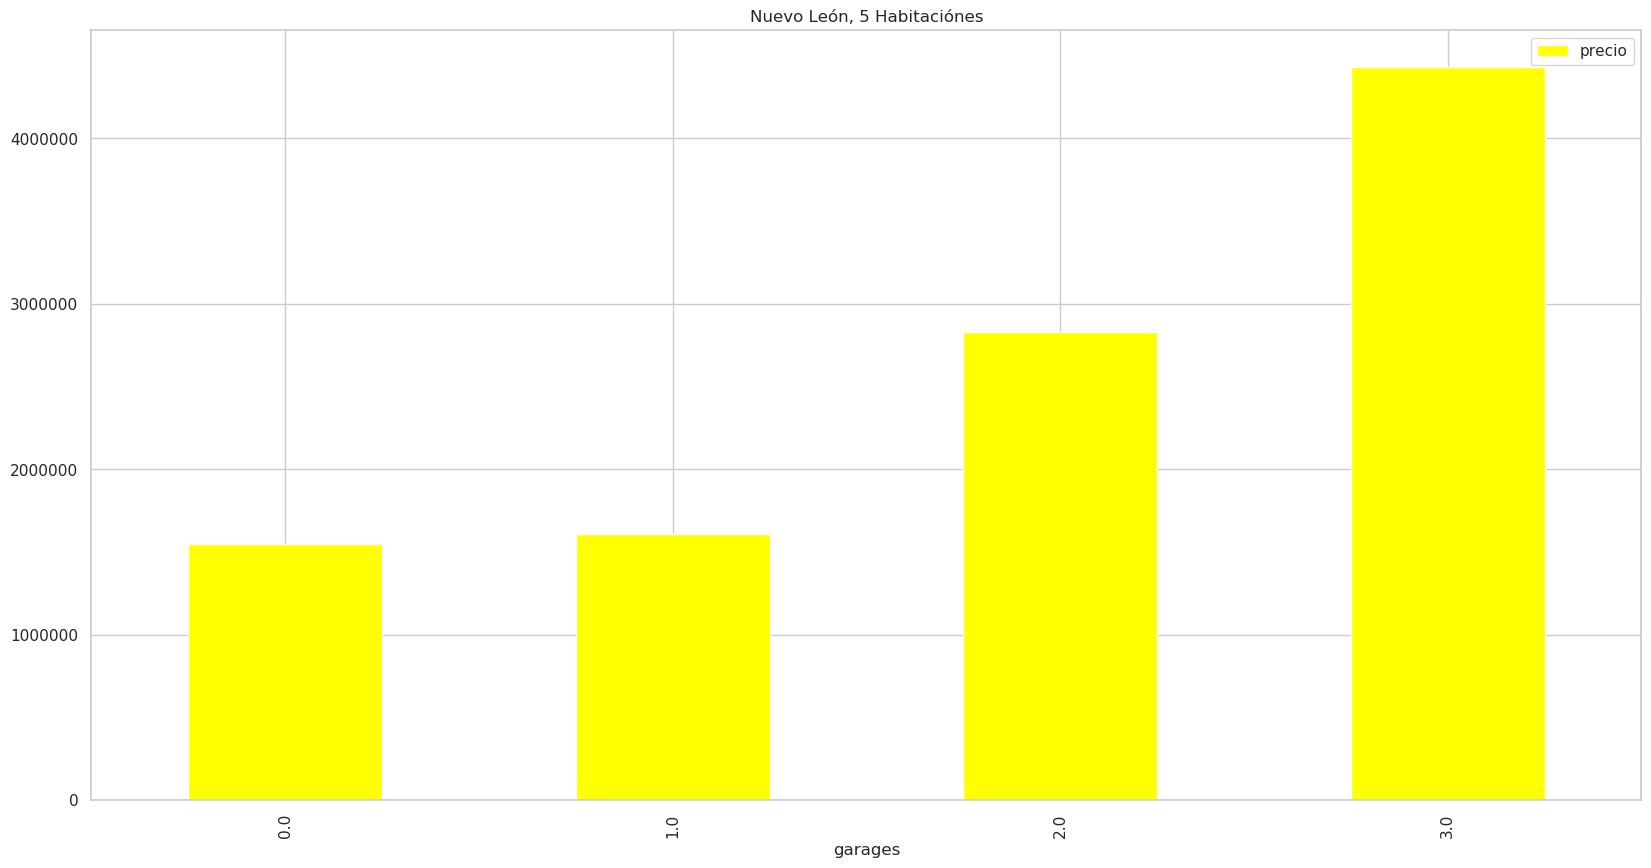

In [404]:
df_garages = df.groupby(['provincia','habitaciones','garages']).agg({'precio':'mean'})

#Algunos ejemplos

df_garages.loc['Distrito Federal']
ej1 = df_garages.loc['Distrito Federal'].loc[1]
ej2 = df_garages.loc['Edo. de México'].loc[3]
ej3 = df_garages.loc['Jalisco'].loc[4]
ej4 = df_garages.loc['Nuevo León'].loc[5]

plt.show(ej1.plot(kind="bar",title= "Distrito Federal, 1 Habitación", color= "blue"))
plt.show(ej2.plot(kind="bar",title= "Estado de Mexico, 3 Habitaciónes", color= "red"))
plt.show(ej3.plot(kind="bar",title= "Jalisco, 4 Habitaciónes", color= "green"))
plt.show(ej4.plot(kind="bar",title= "Nuevo León, 5 Habitaciónes", color= "yellow"))

Se analizaron algunos ejemplos al azar y se puede observar que para todos ellos la tendencia es a que el precio suba a medida que aumentamos el numero de garages, sin embargo, tanto para el Estado de méxico como para Jalisco se ve una disminución significativa del precio cuando las propiedades tienen un solo garage.

Vimos como variaba el precio si teníamos un numéro de habitaciones fijo y aumentabamos el numero de garages. Ahora veamos como varía el precio si dejemos el numero de garages fijo y aumentemos el numero de habitaciones.

In [405]:
###y el analisis?

### 4.4.5 Como afectan el salón de usos múltiples de la propiedad al precio

### Efecto del salón de usos multiples sobre el precio de propiedades de características similares

Queremos ver el efecto de que la propiedad posea un SUM en comparación con su precio, para propiedades de características similares. Para ello, se fija la propiedad y la cantidad de habitaciones, y se compara el promedio de los valores de ambos grupos (con uso multiple y sin uso multiple). Puede ocurrir que para alguna combinación de cantidad de habitaciones con ubicación, no se dispongan de datos suficientes para realizar la comparación. En tal caso la información obtenida reflejará esta situación, mostrando una variación del 0%.

In [469]:
df_variacion_precio_usos=df.groupby(['provincia','habitaciones','usosmultiples']).agg({'precio':'mean'})
df_variacion_precio_usos.index
indices_provincia=df_variacion_precio_usos.index.get_level_values(0)

#lo siguiente lo hice a mano, porque no esta implementada una forma de hacer join con multiindices en pandas

dicc={}

#consigo todas las provincias que se tienen que recorrer
indicesProvincias=df_variacion_precio_usos.index.get_level_values(0)
#recorro las provincias
for provincia in indicesProvincias:
    serieDentroDeProvincia=df_variacion_precio_usos.loc[provincia]
    indices_habitaciones=serieDentroDeProvincia.index.get_level_values(0)
    #recorro las habitaciones dentro de un grupo provincia específico
    for habitaciones in indices_habitaciones:
        serieDentroDeHabitaciones=serieDentroDeProvincia.loc[habitaciones]
        indices_usosMultiples=serieDentroDeHabitaciones.index.values
        lista_precios=[]
        for usosMultiples in indices_usosMultiples:
            lista_precios.append(serieDentroDeHabitaciones.loc[usosMultiples])
            
        #ahora que tengo todos los precios comparo 
        #si la longitud de la lista es igual a 1, significa que solamente habia un solo dato
        #para esas características
        
        if len(lista_precios)==1:
            dicc[(provincia,habitaciones)]=0
        else:
            #la comparación se hace respecto al precio sin uso multiple
            precioSinUso=float(lista_precios[0])
            precioConUso=float(lista_precios[1])
            diferencia=float(abs(precioSinUso-precioConUso))
            porcentajeVariacion=round(((diferencia/precioSinUso)*100),2)
            dicc[(provincia,habitaciones)]=porcentajeVariacion

            
#y ahora queda mostrar la info:
df_muestra=pd.DataFrame(list(dicc.items()))
df_muestra.columns=['Provincia,cantidad de habitaciones','variacion en %']
#df_muestra

Podemos focalizarnos en los casos particulares de propiedades con mayor varianza de precio por tener o no salon de usos múltiples.

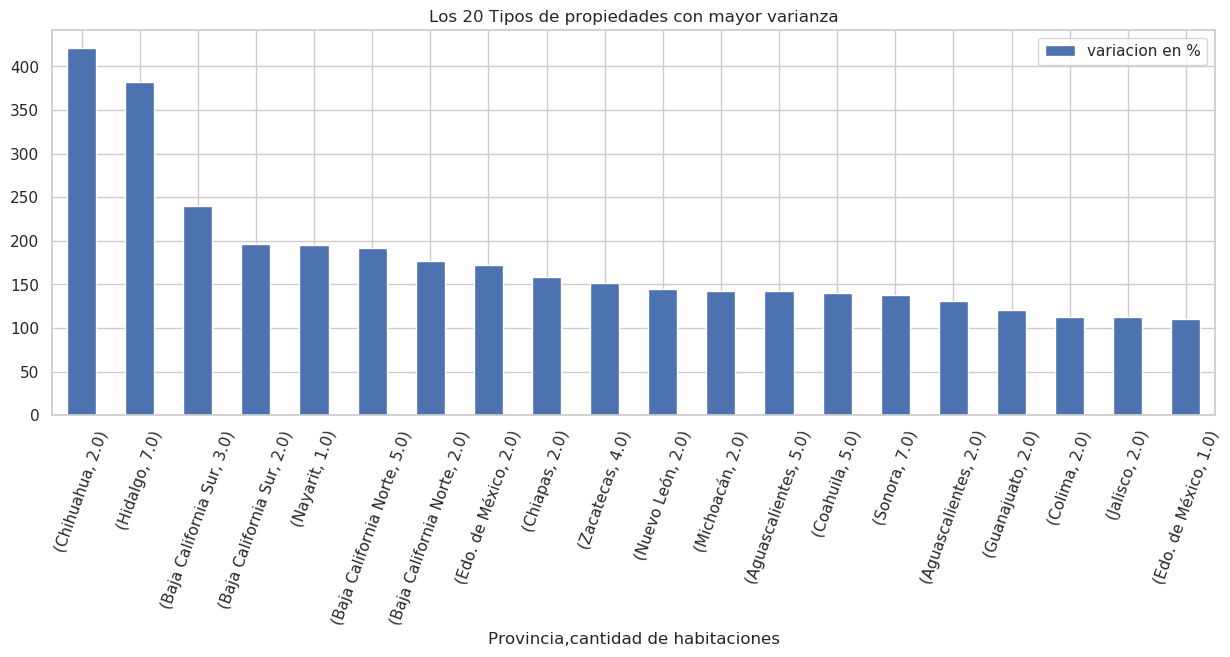

In [407]:
df_muestra.loc[df_muestra['variacion en %'] != 0].sort_values('variacion en %', ascending = False).head(20).set_index('Provincia,cantidad de habitaciones').plot(kind = 'bar',figsize = (15, 5), rot = 70, title = "Los 20 Tipos de propiedades con mayor varianza")

Expliación del grafico:

In [470]:
#se lo pone más bonito
df_muestra.columns=['provincia, habitaciones','variacion precio en %']
#sacamos los ceros, porque no nos aportan informacion para el promedio
df_muestra=df_muestra[df_muestra.loc[:,'variacion precio en %']!=0]
variacion=round(float(df_muestra.apply('mean')),2)
print("Hay una variación promedio de : "+ str(variacion)+"%")

Hay una variación promedio de : 56.4%


Entonces se puede concluir que, en condiciones iguales de ubicación y cantidad de habitaciones, el que una propiedad tenga usos múltiples se traduce en una variación del precio de la misma de un 56,4% respecto de si no tuviera usos múltiples.

### 4.4.6 Precio de la propiedad segun según su antiguedad

Nos interesa saber como se ve afectado el precio de la propiedad basado en la antigüedad de la misma.

**Caso 1:** Análisis directamente la variación en el valor de la propiedad según la antiguedad de la misma, despreciando el efecto en el precio que pueda ocasionar cualquier otro factor.

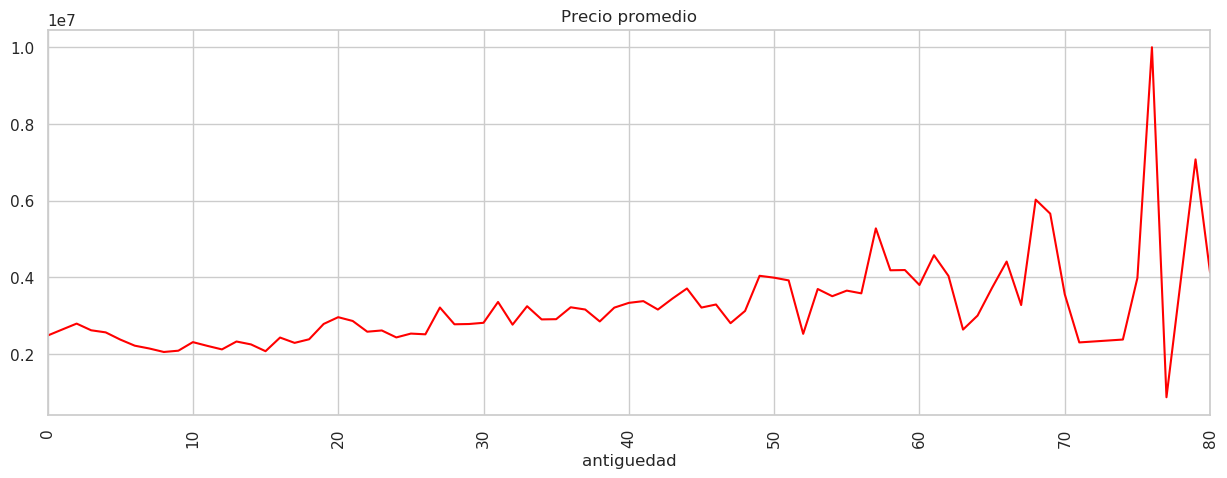

In [474]:
#Tabla
df_propiedades_antiguedad=df.groupby('antiguedad')['precio'].agg(['mean','size'])
df_propiedades_antiguedad.columns=['precio promedio','cantidad']

df_propiedades_antiguedad['precio promedio'].plot(figsize = (15,5), rot = 90, title = "Precio promedio",color="Red")

Notamos varios picos al final, estos se producen al tener pocos datos con valores relativamente grandes, así que vamos a filtrar por cantidad, pedidemos que tengan al menos (inserte_el_número_que_más_convenga) propiedades con una determinada antigüedad para estar en el gráfico.

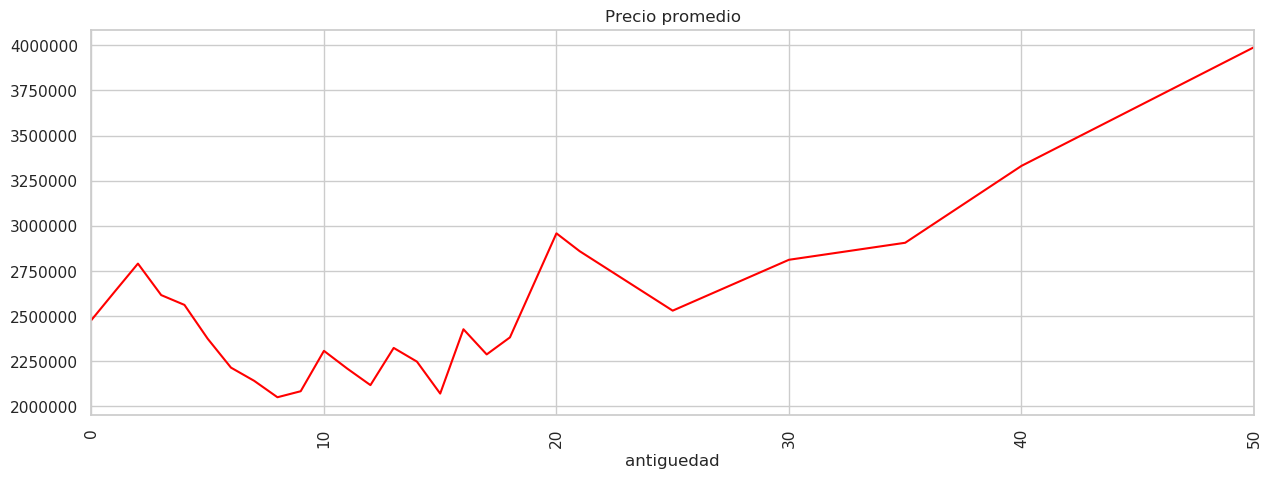

In [479]:
df_propiedades_antiguedad = df_propiedades_antiguedad.loc[df_propiedades_antiguedad.cantidad > 50] #puede cambiar
#Gráfico
df_propiedades_antiguedad['precio promedio'].plot(figsize = (15,5), rot = 90, title = "Precio promedio",color="Red")

Conclusión: dependerá de que numero elijamos para filtrar

**Caso 2:** Vimos como la cantidad de habitaciones es un factor influyente en el precio de una propiedad. Realicemos un análisis del valor de la propiedad en función de la antiguedad y el número de habitaciones de la propiedad.

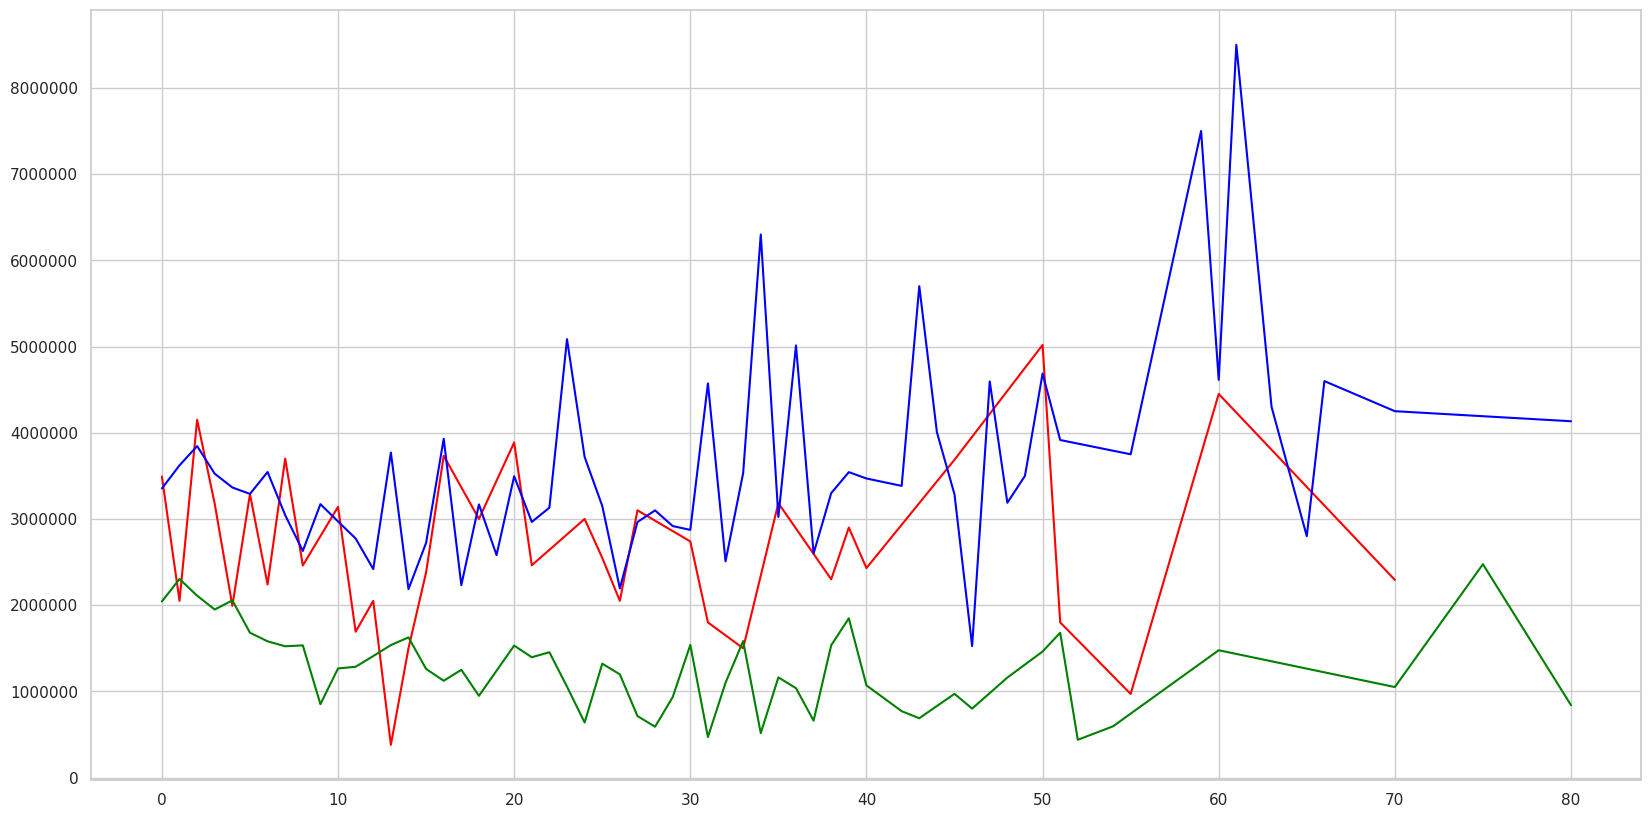

In [480]:
#Comparemos el comportamiento del precio en funcion de la antiguedad para propiedades con 1, 5 y 8 habitaciones.
#sin filtrar
df_antiguedad_habitaciones = df.groupby(['habitaciones','antiguedad'])['precio'].agg(['mean','size'])
df_antiguedad_habitaciones.columns = ['precio promedio','cantidad']
plt.plot(df_antiguedad_habitaciones.loc[8]['precio promedio'],color="red")
plt.plot(df_antiguedad_habitaciones.loc[5]['precio promedio'],color="blue")
plt.plot(df_antiguedad_habitaciones.loc[1]['precio promedio'],color="green")
plt.show()

En general si comparamos dos propiedades con la misma antiguedad, el precio es mayor para la que tiene mas cantidad de habitaciones, por ello la linea azul esta casi siempre ensima de la roja, y la roja ensima de la verde. El precio mas alto de todos (solo considerando estos casos) se alcanza para una porpiedad de aproximadamente 60 años con 8 
habitaciones mientras que el más bajo se alcanza para una propiedad de aproximadamente 13 o 14 años con 5 habitaciones.

Haremos lo mismo que en el analisis anterior y filtraremos las propiedades por una cantidad minima a elección por el grupo.

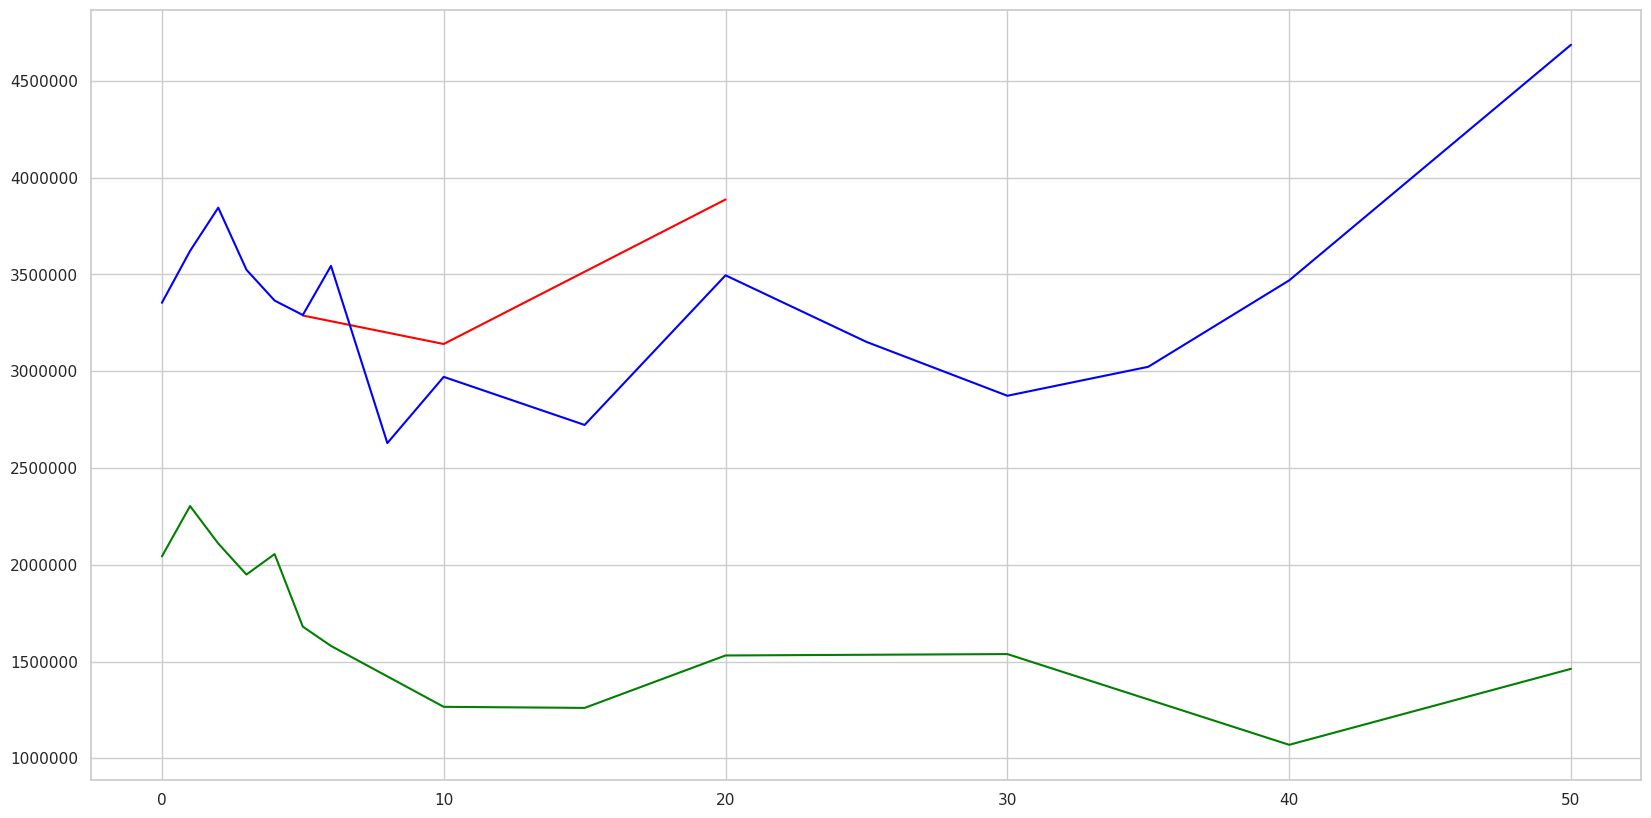

In [484]:
#Comparemos el comportamiento del precio en funcion de la antiguedad para propiedades con 1, 5 y 8 habitaciones.
#filtrando
df_antiguedad_habitaciones = df_antiguedad_habitaciones.loc[df_antiguedad_habitaciones.cantidad > 40] #flitrar
plt.plot(df_antiguedad_habitaciones.loc[8]['precio promedio'],color="red")
plt.plot(df_antiguedad_habitaciones.loc[5]['precio promedio'],color="blue")
plt.plot(df_antiguedad_habitaciones.loc[1]['precio promedio'],color="green")
plt.show()

Conclusión: depende del número que elijamos

### 4.4.7 ¿Es influyente la cercanía a centros comerciales en el precio de la propiedad?

Dentro de una misma ciudad las propiedades pueden ubicarse en diferentes zonas. Veamos como afecta esto a los diferentes tipos de propiedades.

Para esto separemos a las propiedades en tres grupos diferentes: 

**GRUPO 1:** tipos de propiedades que la gente utiliza para vivir, como ser casas, departamente, condominios,etc.

**GRUPO 2:** comercios, como ser local comercial, oficina comercial, etc.

**GRUPO 3:** locales industriales.

**OBS:** Las propiedades que no perenezcan a alguna de estas categorias no se tendran en cuenta para este análisis.

In [413]:
comercios = ['Local Comercial','Oficina comercial','Bodega comercial','Terreno comercial']
industrias = ['Inmuebles productivos urbanos', 'Nave industrial','Terreno industrial','Casa uso de suelo']
viviendas = ['Casa','Apartamento', 'Casa en condominio', 'Quinta Vacacional', 'Duplex','Departamento Compartido','Hospedaje']

**¿Cómo afecta a los comercios?**

In [414]:
comercio_precio_promedio_lejanas = df.loc[df.tipodepropiedad.isin(comercios)]\
.loc[df.centroscomercialescercanos == 0]['precio'].mean()#.round(2)

comercio_precio_promedio_cercanas = df.loc[df.tipodepropiedad.isin(comercios)]\
.loc[df.centroscomercialescercanos > 0]['precio'].mean()#.round(2)

print('Promedio de precio propiedades lejanas a Centros comerciales: ' + str(comercio_precio_promedio_lejanas))
print('Promedio de precio propiedades cercanas a Centros comerciales: ' + str(comercio_precio_promedio_cercanas))

Promedio de precio propiedades lejanas a Centros comerciales: 2495844.138201672
Promedio de precio propiedades cercanas a Centros comerciales: 3085814.0095980805


---

**¿Cómo afecta a las viviendas?**

In [415]:
viviendas_precio_promedio_lejanas = df.loc[df.tipodepropiedad.isin(viviendas)]\
.loc[df.centroscomercialescercanos == 0]['precio'].mean()#.round(2)

viviendas_precio_promedio_cercanas = df.loc[df.tipodepropiedad.isin(viviendas)]\
.loc[df.centroscomercialescercanos > 0]['precio'].mean()#.round(2)

print('Promedio de precio propiedades lejanas a Centros comerciales: ' + str(viviendas_precio_promedio_lejanas))
print('Promedio de precio propiedades cercanas a Centros comerciales: ' + str(viviendas_precio_promedio_cercanas))

Promedio de precio propiedades lejanas a Centros comerciales: 2496302.00355337
Promedio de precio propiedades cercanas a Centros comerciales: 2597532.516430351


---

**¿Cómo afecta a las propiedes destinadas a la industria?**

In [416]:
industria_precio_promedio_lejanas = df.loc[df.tipodepropiedad.isin(industrias)]\
.loc[df.centroscomercialescercanos == 0]['precio'].mean()#.round(2)

industria_precio_promedio_cercanas= df.loc[df.tipodepropiedad.isin(industrias)]\
.loc[df.centroscomercialescercanos > 0]['precio'].mean()#.round(2)

print('Promedio de precio propiedades lejanas a Centros comerciales: ' + str(industria_precio_promedio_lejanas))
print('Promedio de precio propiedades cercanas a Centros comerciales: ' + str(industria_precio_promedio_cercanas))

Promedio de precio propiedades lejanas a Centros comerciales: 3535664.8321479373
Promedio de precio propiedades cercanas a Centros comerciales: 4176779.762820513


Para poder hacer un analisis general de estos resultados procedamos a volcarlos en una tabla y un grafico comparativo.

In [417]:
resultados = pd.DataFrame([['Comercio', comercio_precio_promedio_cercanas, comercio_precio_promedio_lejanas],
                            ['Viviendas', viviendas_precio_promedio_cercanas, viviendas_precio_promedio_lejanas],
                            ['Industria', industria_precio_promedio_cercanas, industria_precio_promedio_lejanas]],
            columns = ['Tipo de propiedades', 'con Centros Comerciales cercanos', 'con Centros Comerciales lejanos']).set_index('Tipo de propiedades')
resultados

,con Centros Comerciales cercanos,con Centros Comerciales lejanos
Tipo de propiedades,,
Comercio,"3,085,814.01","2,495,844.14"
Viviendas,"2,597,532.52","2,496,302.00"
Industria,"4,176,779.76","3,535,664.83"


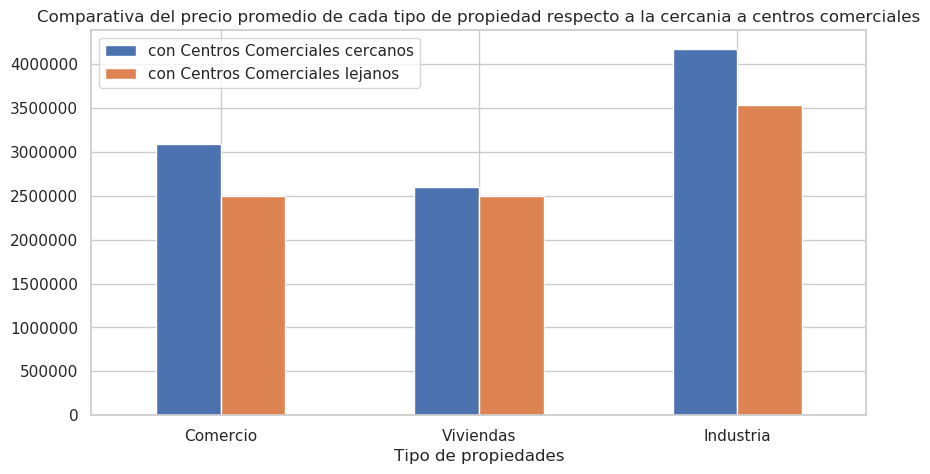

In [418]:
resultados.plot(kind = 'bar', figsize = (10, 5), rot = 0, title = "Comparativa del precio promedio de cada tipo de propiedad respecto a la cercania a centros comerciales")

**Conclusión:** Se puede ver como en todos los casos las propiedades que poseen centros comerciales cercanos son en promedio más caras. Sin embargo para lo que es viviendas, la diferencia no es tan notoria como si lo es para las propiedades destinadas al comercio y a la industria.

### 4.4.8 ¿Es influyente la cercanía a las escuelas en el precio de la propiedad?

Se realiza el mismo análisis del apartado anterior, siendo la cercanía de la propiedad a escuelas y su relación con el precio de la propiedad el objeto de estudio. Las propiedades serán agrupadas nuevamente en los grupos: Industria, Vivienda y Comercio.

In [487]:
#caso comercios
comercio_precio_promedio_cercanas = df.loc[df.tipodepropiedad.isin(comercios)]\
.loc[df.escuelascercanas > 0]['precio'].mean()#.round(2)

comercio_precio_promedio_lejanas = df.loc[df.tipodepropiedad.isin(comercios)]\
.loc[df.escuelascercanas == 0]['precio'].mean()#.round(2)
print('Precio promedio de comercios lejanos a escuelas: ' + str(comercio_precio_promedio_lejanas))
print('Precio promedio de comercios cercanos a escuelas: ' + str(comercio_precio_promedio_cercanas))

Precio promedio de comercios lejanos a escuelas: 2530785.7951666666
Precio promedio de comercios cercanos a escuelas: 3002277.27552356


In [488]:
# caso viviendas
viviendas_precio_promedio_cercanas = df.loc[df.tipodepropiedad.isin(viviendas)]\
.loc[df.escuelascercanas > 0]['precio'].mean()#.round(2)

viviendas_precio_promedio_lejanas = df.loc[df.tipodepropiedad.isin(viviendas)]\
.loc[df.escuelascercanas == 0]['precio'].mean()#.round(2)

print('Precio promedio de viviendas lejanas a escuelas: ' + str(viviendas_precio_promedio_lejanas))
print('Precio promedio de viviendas cercanas a escuelas: ' + str(viviendas_precio_promedio_cercanas))

Precio promedio de viviendas lejanas a escuelas: 2543614.8829724444
Precio promedio de viviendas cercanas a escuelas: 2530572.131678574


In [421]:
# caso industrias
industrias_precio_promedio_cercanas = df.loc[df.tipodepropiedad.isin(industrias)]\
.loc[df.escuelascercanas > 0]['precio'].mean()#.round(2)

industrias_precio_promedio_lejanas = df.loc[df.tipodepropiedad.isin(industrias)]\
.loc[df.escuelascercanas == 0]['precio'].mean()#.round(2)
print('Precio promedio de industrias lejanas a escuelas: ' + str(industrias_precio_promedio_lejanas))
print('Precio promedio de industrias cercanas a escuelas: ' + str(industrias_precio_promedio_cercanas))

Precio promedio propieades lejanas a escuelas: 3511823.9080291972
Precio promedio propiedades cercanas a escuelas: 4191297.8363636364


Tal como en el analisis anterior procedamos a volcar los resultados en una tabla y un grafico comparativo.

In [422]:
resultados = pd.DataFrame([['Comercio', comercio_precio_promedio_cercanas, comercio_precio_promedio_lejanas],
                            ['Viviendas', viviendas_precio_promedio_cercanas, viviendas_precio_promedio_lejanas],
                            ['Industria', industria_precio_promedio_cercanas, industria_precio_promedio_lejanas]],
            columns = ['Tipo de propiedades', 'con Escuelas cercanas', 'con Escuelas lejanas']).set_index('Tipo de propiedades')
resultados

,con Escuelas cercanas,con Escuelas lejanas
Tipo de propiedades,,
Comercio,"3,002,277.28","2,530,785.80"
Viviendas,"2,530,572.13","2,543,614.88"
Industria,"4,176,779.76","3,535,664.83"


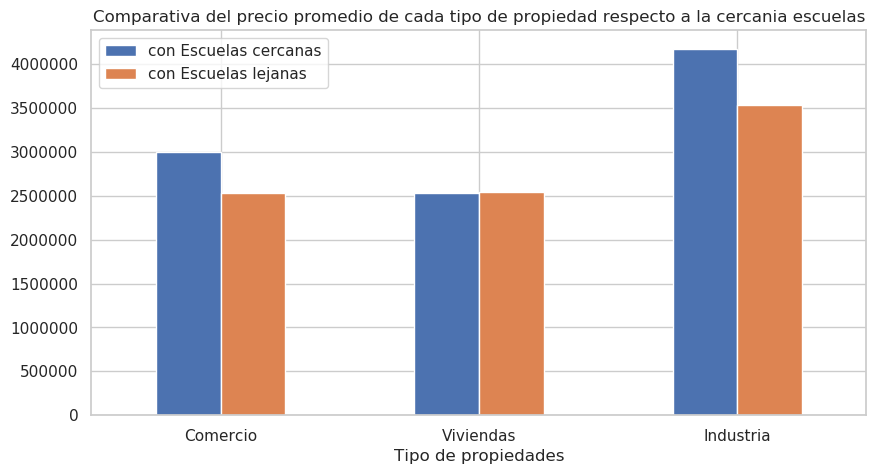

In [423]:
resultados.plot(kind = 'bar', figsize = (10, 5), rot = 0, title = "Comparativa del precio promedio de cada tipo de propiedad respecto a la cercania escuelas")

**Conclusión:** En este caso,las viviendas que no están cerca de las escuelas son ligeramente más caras que las que están cercas. En el caso de los comercios y la industria, estár cerca de una escuela aumenta el precio.

### 4.4.9 Como afecta tener un gimnasio al precio de la propiedad

Se realiza el mismo análisis del apartado anterior, viendo como tener un gimnasio afecta al precio. Las propiedades serán agrupadas nuevamente en los grupos: Industria, Vivienda y Comercio.

In [489]:
#caso comercios
comercio_precio_promedio_con_gym = df.loc[df.tipodepropiedad.isin(comercios)]\
.loc[df.gimnasio > 0]['precio'].mean()#.round(2)

comercio_precio_promedio_sin_gym = df.loc[df.tipodepropiedad.isin(comercios)]\
.loc[df.gimnasio == 0]['precio'].mean()#.round(2)
print('Precio promedio de propiedades con gimnasio: ' + str(comercio_precio_promedio_con_gym))
print('Precio promedio de propiedades sin gimnasio: ' + str(comercio_precio_promedio_sin_gym))

Precio promedio de propiedades con gimnasio: 2425000.0
Precio promedio de propiedades sin gimnasio: 2626513.810017271


In [492]:
# caso viviendas
viviendas_precio_promedio_con_gym = df.loc[df.tipodepropiedad.isin(viviendas)]\
.loc[df.gimnasio > 0]['precio'].mean()#.round(2)

viviendas_precio_promedio_sin_gym = df.loc[df.tipodepropiedad.isin(viviendas)]\
.loc[df.gimnasio == 0]['precio'].mean()#.round(2)

print('Precio promedio de viviendas con gimnasio: ' + str(viviendas_precio_promedio_con_gym))
print('Precio promedio de viviendas sin gimnasio: ' + str(viviendas_precio_promedio_sin_gym))

Precio promedio de viviendas con gimnasio: 3814272.2117129136
Precio promedio de viviendas sin gimnasio: 2443918.422775811


In [494]:
# caso industrias
industrias_precio_promedio_con_gym = df.loc[df.tipodepropiedad.isin(industrias)]\
.loc[df.gimnasio > 0]['precio'].mean()#.round(2)

industrias_precio_promedio_sin_gym = df.loc[df.tipodepropiedad.isin(industrias)]\
.loc[df.gimnasio == 0]['precio'].mean()#.round(2)
print('Precio promedio de industrias con gimnasio: ' + str(industrias_precio_promedio_con_gym))
print('Precio promedio de industrias sin gimnasio: ' + str(industrias_precio_promedio_sin_gym))

Precio promedio de industrias con gimnasio: nan
Precio promedio de industrias sin gimnasio: 3732736.6137931035


In [496]:
resultados = pd.DataFrame([['Comercio', comercio_precio_promedio_con_gym, comercio_precio_promedio_sin_gym],
                            ['Viviendas', viviendas_precio_promedio_con_gym, viviendas_precio_promedio_sin_gym],
                            ['Industria', industrias_precio_promedio_con_gym, industrias_precio_promedio_sin_gym]],
            columns = ['Tipo de propiedades', 'con gym', 'sin gym']).set_index('Tipo de propiedades')
resultados

,con gym,sin gym
Tipo de propiedades,,
Comercio,"2,425,000.00","2,626,513.81"
Viviendas,"3,814,272.21","2,443,918.42"
Industria,nan,"3,732,736.61"


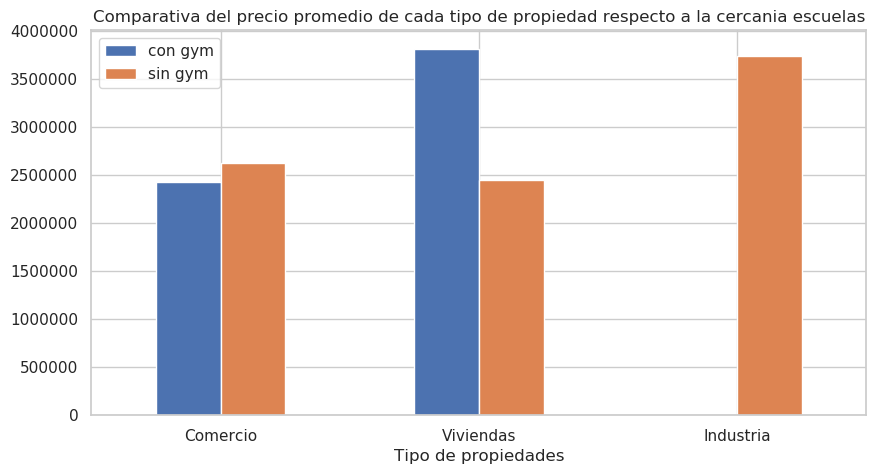

In [497]:
resultados.plot(kind = 'bar', figsize = (10, 5), rot = 0, title = "Comparativa del precio promedio de cada tipo de propiedad respecto a la cercania escuelas")

In [498]:
#conclusión y explicaciones de los graficos y analisis

### 4.4.10 Como aumenta el precio en relación a los metros totales o a los metros ocupados

Veremos como afecta la cantidad total de metros al precio, para eso, solo vamos a analizar como afecta a las viviendas (casas, apartamentos, apartamentos compartidos, duplex, etc) para los negocios, y edificios industriales se necesitará un analisis aparte.

**Precio de las viviendas según sus metros totales**

In [501]:
#viviendas = ['Casa','Apartamento', 'Casa en condominio', 'Quinta Vacacional', 'Duplex','Casa uso de suelo','Departamento Compartido','Hospedaje']

#df_viviendas = df.loc[df.tipodepropiedad.isin(viviendas)].groupby(['metrostotales','tipodepropiedad'])['precio'].agg(['size','mean'])
#debemos quedarnos solo con un valor de metros totales, hay varios repetidos, logicamente

df_viviendas = df.loc[df.tipodepropiedad.isin(viviendas)].groupby('metrostotales')['precio']\
.agg(['size','mean'])

df_viviendas.columns = ['cantidad_de_propiedades','precio_promedio']
df_viviendas = df_viviendas.loc[(df_viviendas.cantidad_de_propiedades > 400)] #cambiar el numero para filtrar
df_viviendas.sort_values('metrostotales', ascending=False)

,cantidad_de_propiedades,precio_promedio
metrostotales,,
420.00,471,"5,341,807.22"
400.00,1558,"4,426,260.88"
390.00,415,"5,684,095.12"
380.00,409,"5,314,381.08"
360.00,882,"4,324,038.14"
350.00,988,"4,462,130.10"
330.00,456,"4,569,362.93"
320.00,642,"4,453,235.62"
300.00,4101,"3,801,300.37"


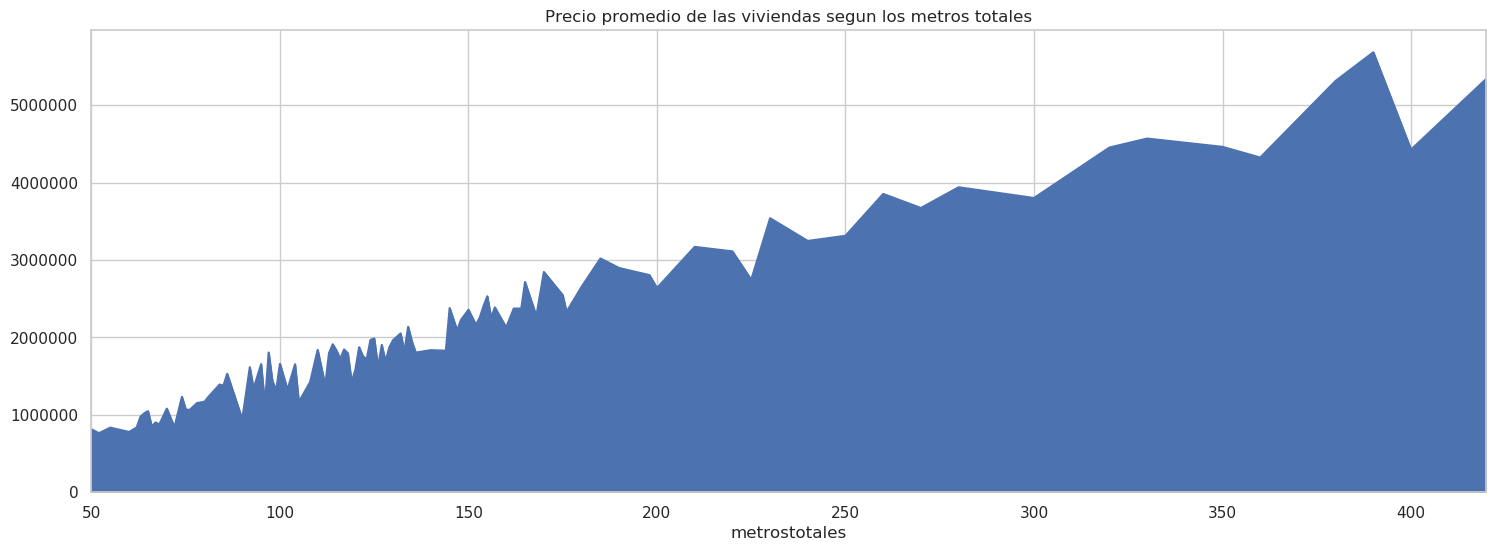

In [509]:
df_viviendas['precio_promedio'].plot(kind='area', figsize=(18, 6), rot=0, title="Precio promedio de las viviendas segun los metros totales");

In [510]:
#explicacion del grafico

---

**Precio de los comercios según sus metros totales**

In [511]:
#comercios = ['Local Comercial','Oficina comercial','Bodega comercial','Terreno comercial'] 
#Faltaría el "local en centro comercial"

df_comercios = df.loc[df.tipodepropiedad.isin(comercios)].groupby('metrostotales')['precio']\
.agg(['size','mean'])

df_comercios.columns = ['cantidad_de_propiedades','precio_promedio']
df_comercios = df_comercios.loc[(df_comercios.cantidad_de_propiedades>50)] #cambiar el numero para filtrar
df_comercios.sort_values('precio_promedio', ascending=False)

,cantidad_de_propiedades,precio_promedio
metrostotales,,
300.00,203,"2,857,700.07"
400.00,143,"2,749,530.04"
180.00,71,"2,724,811.27"
250.00,152,"2,614,734.34"
240.00,54,"2,591,147.50"
200.00,222,"2,515,813.65"
120.00,70,"2,245,955.27"
60.00,61,"1,996,309.10"
100.00,64,"1,965,181.25"


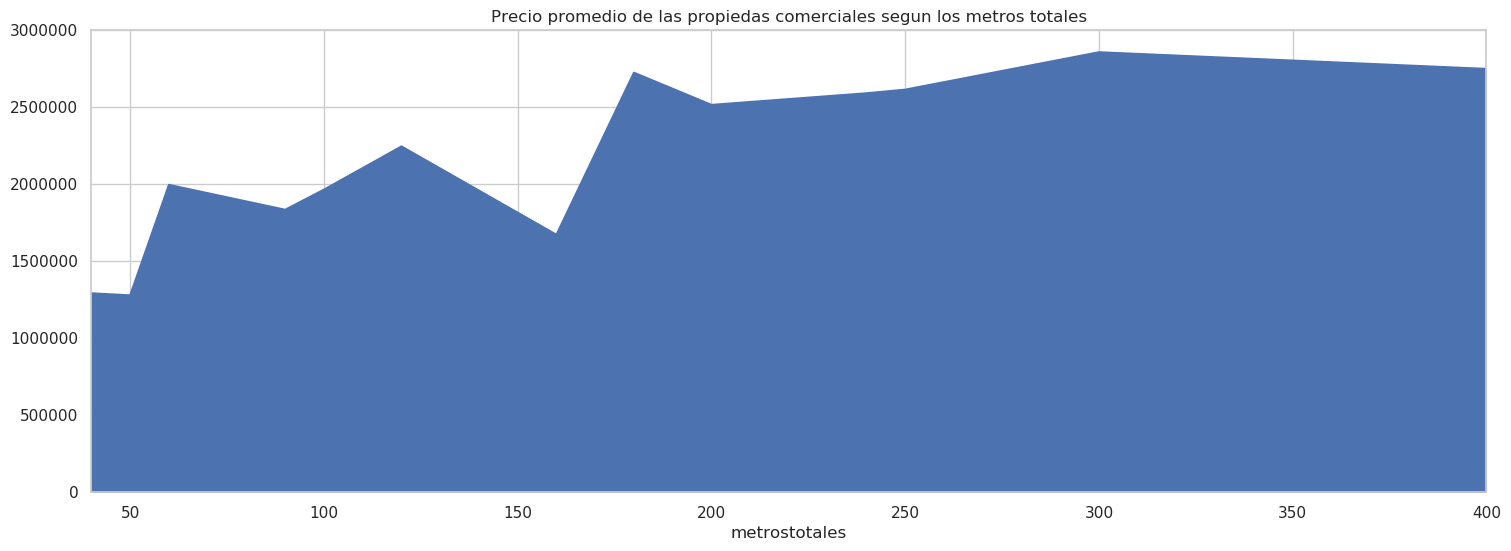

In [512]:
df_comercios['precio_promedio'].plot(kind='area', figsize=(18, 6), rot=0, title="Precio promedio de las propiedas comerciales segun los metros totales");

In [513]:
#explicaciones

---

**Precio de los edificios industriales según sus metros totales**

In [514]:
#industrias = ['Inmuebles productivos urbanos', 'Nave industrial','Terreno industrial','Casa uso de suelo']

df_industrias = df.loc[df.tipodepropiedad.isin(industrias)].groupby('metrostotales')['precio']\
.agg(['size','mean'])

df_industrias.columns = ['cantidad_de_propiedades','precio_promedio']
df_industrias = df_industrias.loc[(df_industrias.cantidad_de_propiedades>10)] #cambiar el numero para filtrar
df_industrias.sort_values('precio_promedio', ascending=False)

,cantidad_de_propiedades,precio_promedio
metrostotales,,
300.00,35,"4,583,954.86"
240.00,18,"4,573,333.33"
400.00,22,"4,051,550.00"
180.00,18,"3,019,888.89"
200.00,43,"2,980,797.05"
220.00,12,"2,977,750.00"
150.00,14,"2,954,214.29"
250.00,27,"2,870,010.07"
160.00,13,"2,713,461.54"


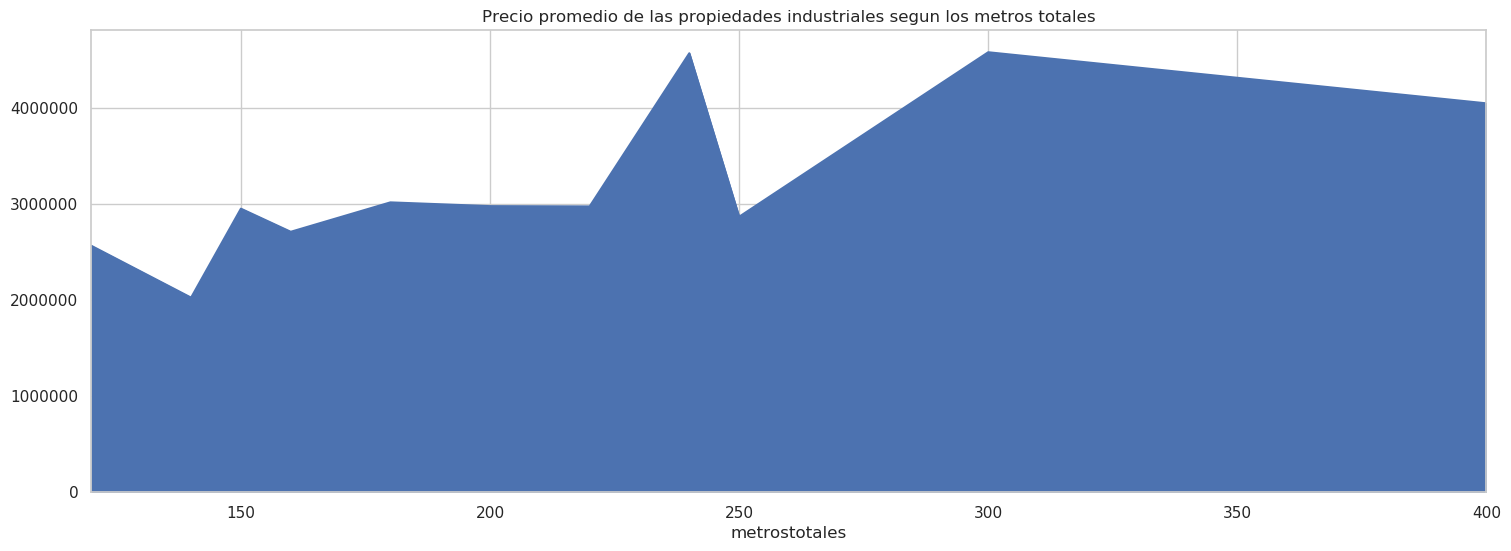

In [515]:
df_industrias['precio_promedio'].plot(kind='area', figsize=(18, 6), rot=0, title="Precio promedio de las propiedades industriales segun los metros totales");

In [516]:
#Explicaciones

Convergamos los datos de los 3 graficos para podes contrastar mejor los resultados.

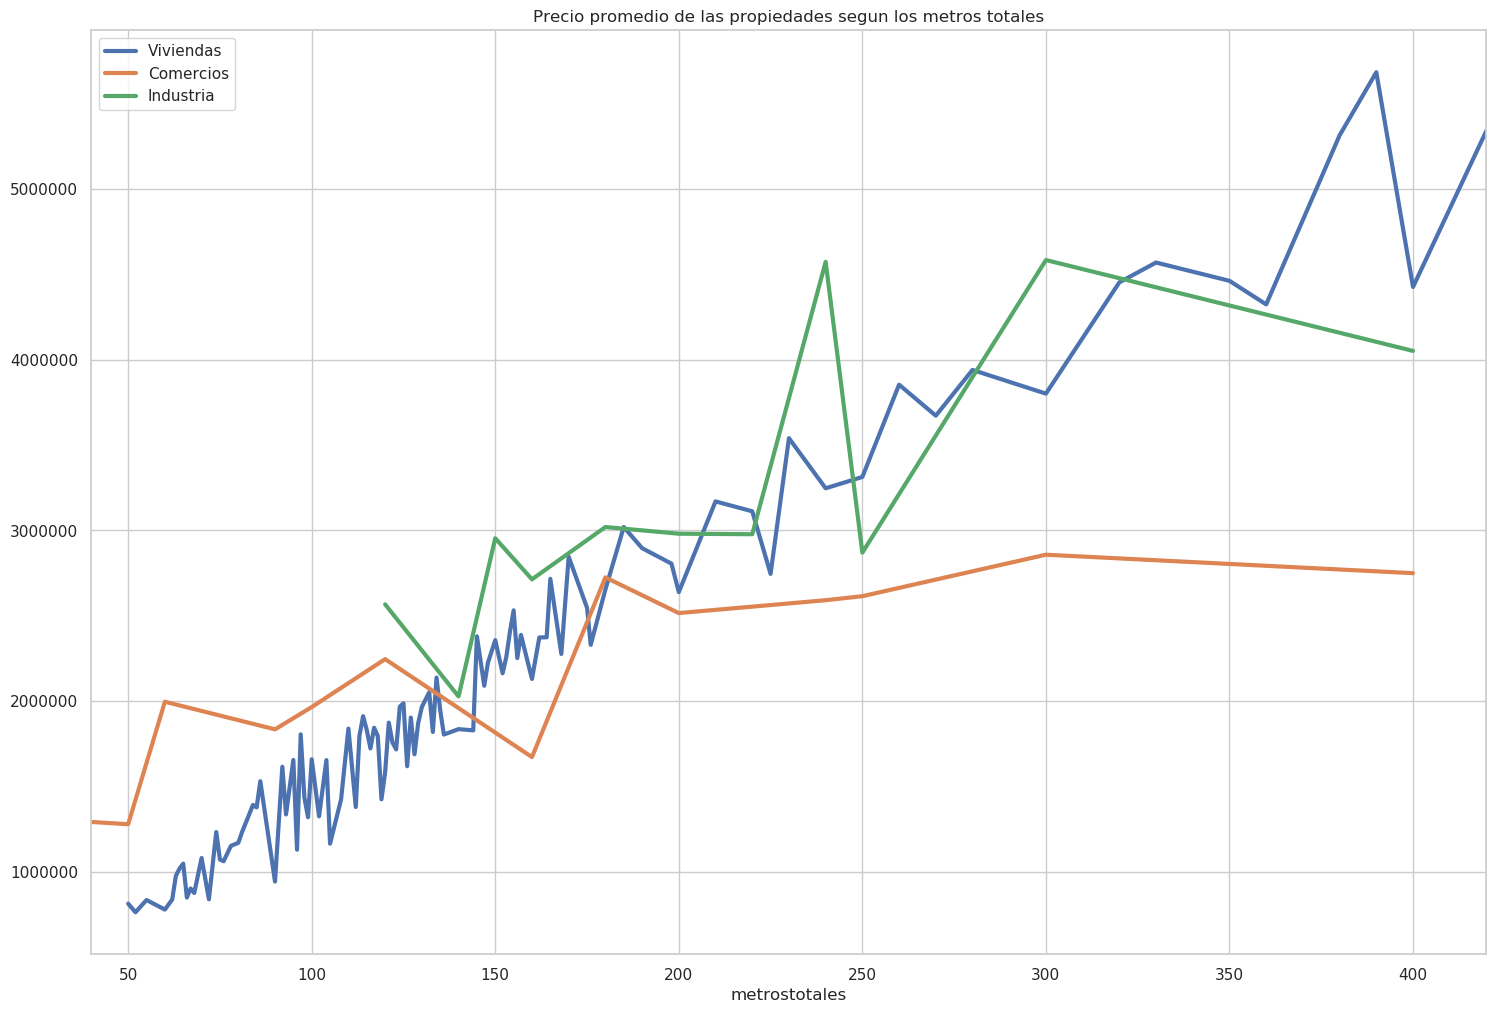

In [517]:
df_viviendas['precio_promedio'].plot(kind='line', figsize=(18, 12), linewidth = 3.0,rot=0, title="Precio promedio de las propiedades segun los metros totales", label = 'Viviendas', legend = ' ');

df_comercios['precio_promedio'].plot(kind='line', figsize=(18, 12), linewidth = 3.0, rot=0, label = 'Comercios', legend = ' ');

df_industrias['precio_promedio'].plot(kind='line', figsize=(18, 12), linewidth = 3.0, rot=0, label = 'Industria', legend = ' ');

In [518]:
#conclusiones

## 4.5 Análisis de propiedades

Analizaremos algunas caracteristicas sobre las propiedades, estas no dependen de su ubicación pero tal vez podriamos ubicarla en la sección 4.3. Empezaremos con ver cuales son las propiedades con más espacio de todas las opciones que tenemos.

In [436]:
espacio_de_propiedades = df.groupby('tipodepropiedad')['metrostotales'].agg(['size','sum','mean'])
espacio_de_propiedades.columns = ['cantidad_de_propiedades','metros_sum','metros_promedio']
espacio_de_propiedades.sort_values('metros_promedio', ascending=False)

,cantidad_de_propiedades,metros_sum,metros_promedio
tipodepropiedad,,,
Nave industrial,76,"12,785.00",284.11
Terreno industrial,31,"4,252.00",283.47
Terreno comercial,1326,"284,332.00",268.24
Lote,5,"1,319.00",263.80
Bodega comercial,1406,"297,570.00",261.72
Terreno,9945,"2,269,266.00",261.59
Inmuebles productivos urbanos,200,"36,207.00",239.78
Edificio,1396,"289,095.00",231.46
Casa uso de suelo,708,"136,827.00",228.43


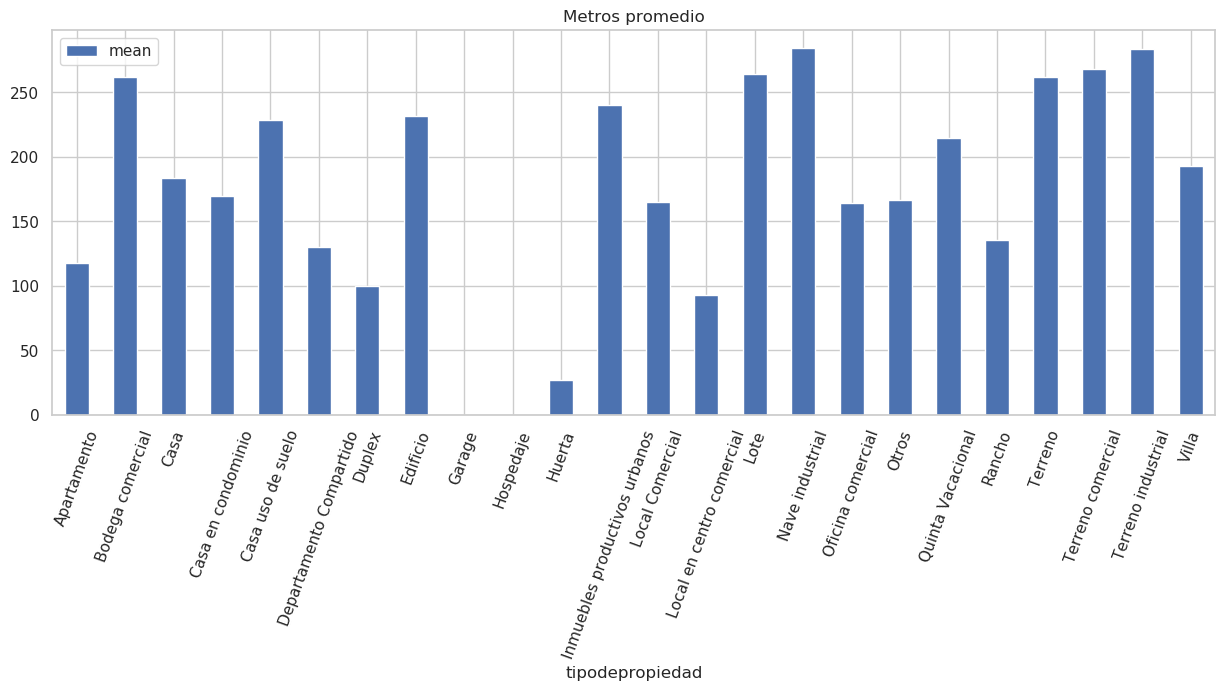

In [437]:
dfaux = df.groupby('tipodepropiedad')['metrostotales'].agg(['mean'])

dfaux.plot(kind='bar', figsize=(15, 5), rot=70, title="Metros promedio");
#me gustaria ordenarlo de mayor a menor pero no
#se si asi es mejor

Vemos que logicamente, los almacenes industriales son los mas espaciosos, no parece un analisis muy fructífero, así que ahora analizamos los casos por secciones como hicimos antes, empezaremos con las viviendas.

**Espacio de las viviendas**

In [519]:
#viviendas = ['Casa','Apartamento', 'Casa en condominio', 'Quinta Vacacional', 'Duplex','Casa uso de suelo','Departamento Compartido','Hospedaje']

df_viviendas = df.loc[df.tipodepropiedad.isin(viviendas)].groupby('tipodepropiedad')\
.agg({'metrostotales': ['size', 'sum', 'mean']})

df_viviendas.columns = ['cantidad_de_propiedades', 'metros_totales','tamanio_promedio']
df_viviendas = df_viviendas.loc[(df_viviendas.cantidad_de_propiedades>100)] #cambiar el numero para filtrar
df_viviendas.sort_values('tamanio_promedio', ascending=False)

,cantidad_de_propiedades,metros_totales,tamanio_promedio
tipodepropiedad,,,
Quinta Vacacional,395,"10,503.00",214.35
Casa,141717,"22,982,196.00",183.77
Casa en condominio,19297,"2,910,507.00",169.73
Departamento Compartido,141,"13,171.00",130.41
Apartamento,57341,"3,460,357.00",117.91
Duplex,343,"31,890.00",100.28


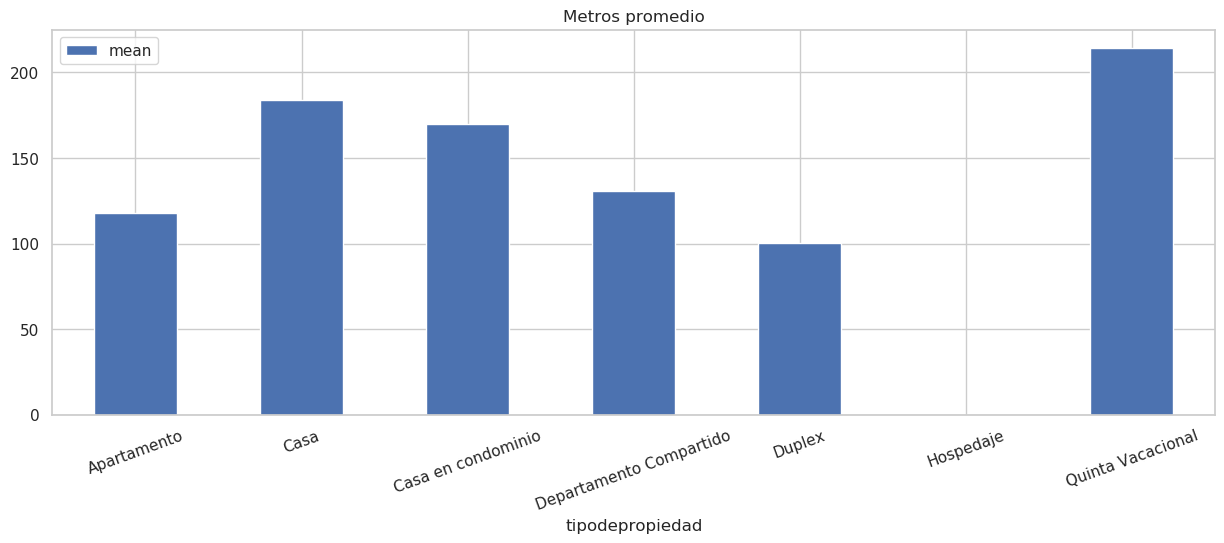

In [520]:
dfaux = df.loc[df.tipodepropiedad.isin(viviendas)].groupby('tipodepropiedad')['metrostotales'].agg(['mean'])
dfaux.plot(kind='bar', figsize=(15, 5), rot=20, title="Metros promedio");

In [528]:
#explicaciones

---

**Espacio de los comercios**

In [521]:
df_comercios = df.loc[df.tipodepropiedad.isin(comercios)].groupby('tipodepropiedad')\
.agg({'metrostotales': ['size', 'sum', 'mean']})

df_comercios.columns = ['cantidad_de_propiedades', 'metros_totales','tamanio_promedio']
df_comercios = df_comercios.loc[(df_comercios.cantidad_de_propiedades>0)] #cambiar el numero para filtrar
df_comercios.sort_values('tamanio_promedio', ascending=False)

,cantidad_de_propiedades,metros_totales,tamanio_promedio
tipodepropiedad,,,
Terreno comercial,1326,"284,332.00",268.24
Bodega comercial,1406,"297,570.00",261.72
Local Comercial,3055,"364,394.00",165.26
Oficina comercial,1741,"157,592.00",163.99


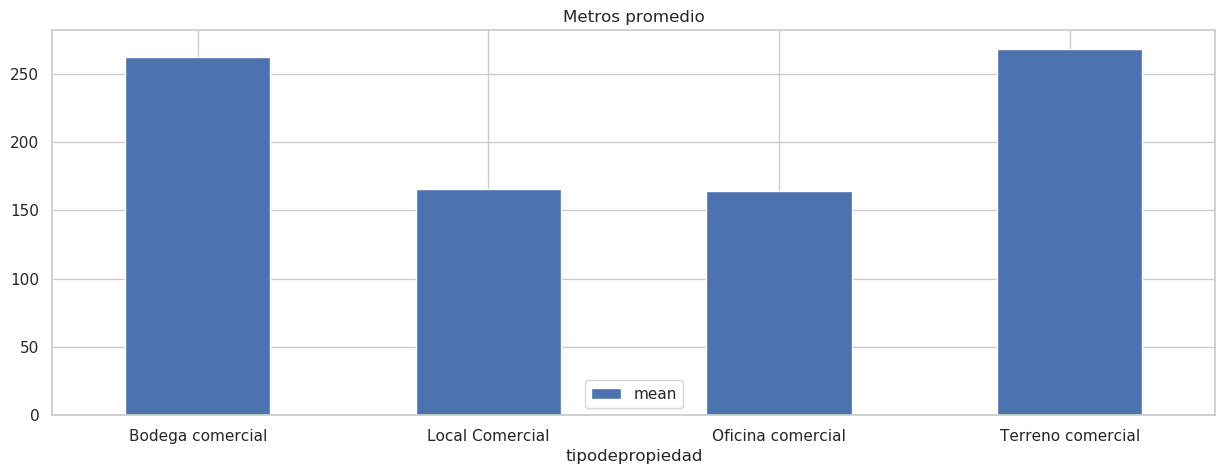

In [522]:
dfaux = df.loc[df.tipodepropiedad.isin(comercios)].groupby('tipodepropiedad')['metrostotales'].agg(['mean'])
dfaux.plot(kind='bar', figsize=(15, 5), rot=0, title="Metros promedio");

In [529]:
#explicaciones

---

**Espacio de los edificios industriales**

In [523]:
df_industrias = df.loc[df.tipodepropiedad.isin(industrias)].groupby('tipodepropiedad')\
.agg({'metrostotales': ['size', 'sum', 'mean']})

df_industrias.columns = ['cantidad_de_propiedades', 'metros_totales','tamanio_promedio']
df_industrias = df_industrias.loc[(df_industrias.cantidad_de_propiedades>10)] #cambiar el numero para filtrar
df_industrias.sort_values('tamanio_promedio', ascending=False)

,cantidad_de_propiedades,metros_totales,tamanio_promedio
tipodepropiedad,,,
Nave industrial,76,"12,785.00",284.11
Terreno industrial,31,"4,252.00",283.47
Inmuebles productivos urbanos,200,"36,207.00",239.78
Casa uso de suelo,708,"136,827.00",228.43


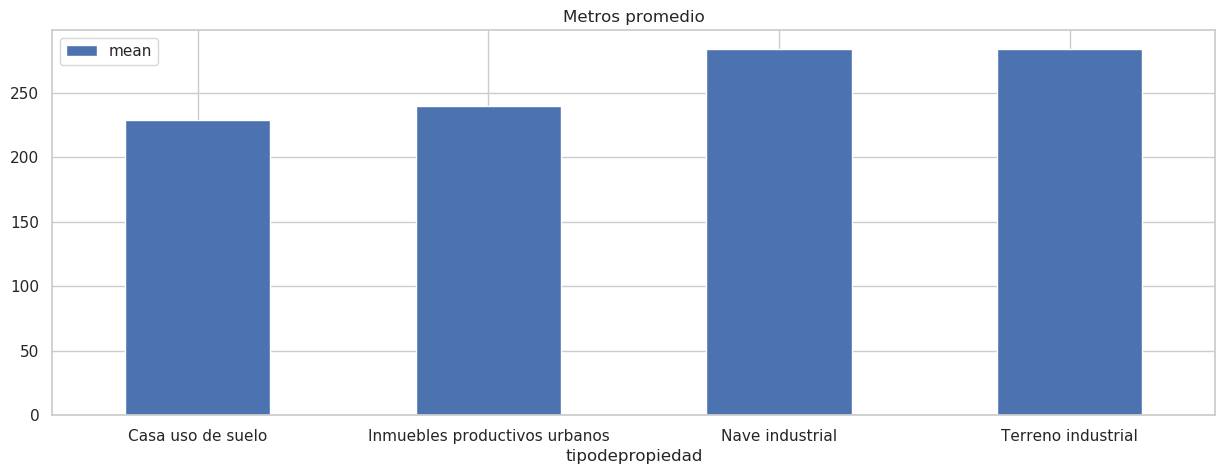

In [524]:
dfaux = df.loc[df.tipodepropiedad.isin(industrias)].groupby('tipodepropiedad')['metrostotales'].agg(['mean'])
dfaux.plot(kind='bar', figsize=(15, 5), rot=0, title="Metros promedio");

In [530]:
#explicaciones

# 4.6 Analisis de las fechas

Vamos a analizar los datos teniendo en cuenta las fechas, para facilitar el trabajo, convertiremos los datos de la columna 'fecha' a un DateTime y crear una nueva columna con el año y con el mes.

In [531]:
df['fecha'] = pd.to_datetime(df['fecha'])
df['anio'] = df['fecha'].dt.year

Empezaremos con algo simple, veremos como va cambiando el precio en promedio a lo largo de los años.

In [532]:
df_fechas = df.groupby('anio')['precio'].agg(['size','mean'])
df_fechas.columns = ['cantidad_de_propiedades', 'precio_promedio']
#df_fechas = df_fechas.sort_values('precio_promedio', ascending = False)
df_fechas

,cantidad_de_propiedades,precio_promedio
anio,,
2012,23534,"2,032,517.56"
2013,30386,"2,125,061.05"
2014,40572,"2,364,594.65"
2015,51470,"2,634,569.73"
2016,94038,"2,801,614.15"


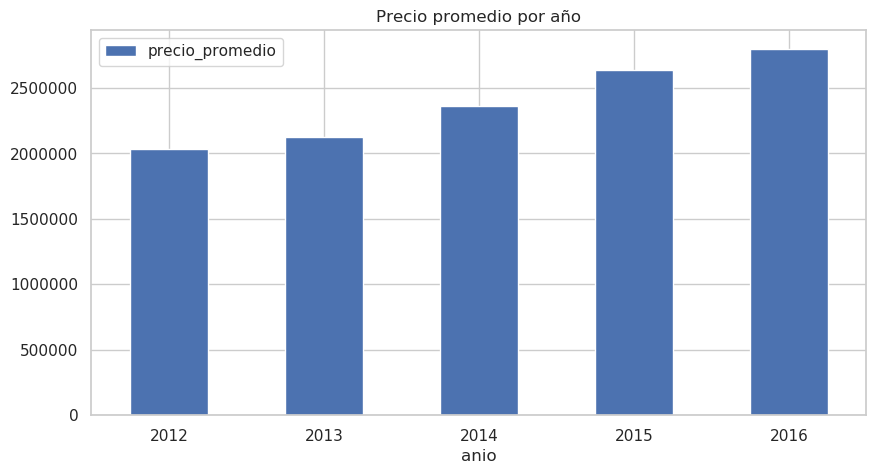

In [533]:
df_fechas.plot.bar(y = 'precio_promedio', figsize=(10,5), rot=0,title="Precio promedio por año")

Vemos que a medida de que pasa el tiempo, hay más propiedades a la venta por lo que el precio promedio aumenta. Vamos a analizar que pasa en un año en particular, elegiremos el 2016 ya que parece el que más datos tiene para analizar.

In [536]:
df_2016 = df.loc[df.anio >2015] #formato aaaa-mm-dd

In [537]:
df['mes'] = df['fecha'].dt.month

dfaux = df.groupby('mes')['precio'].agg(['size','mean'])
dfaux.columns = ['cantidad_de_propiedades', 'precio_promedio']
#dfaux = dfaux.sort_values('precio_promedio', ascending = False) #deberia ponerle el nombre del mes en vez del numero?
dfaux

,cantidad_de_propiedades,precio_promedio
mes,,
1,16009,"2,380,728.28"
2,13723,"2,395,430.20"
3,14732,"2,498,691.19"
4,16466,"2,546,977.10"
5,16062,"2,457,124.77"
6,17221,"2,520,843.26"
7,17510,"2,551,788.47"
8,20897,"2,517,020.83"
9,20622,"2,558,958.43"


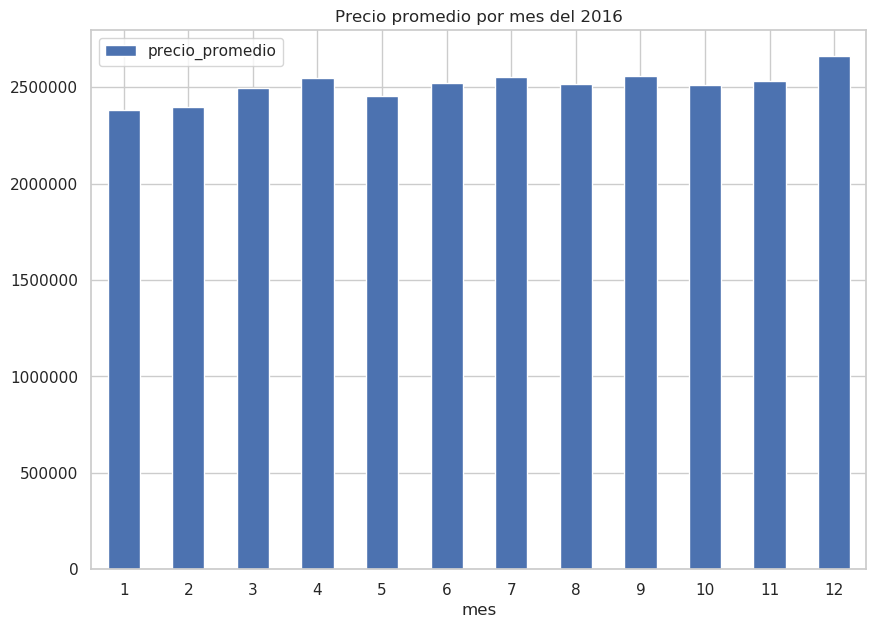

In [538]:
dfaux.plot.bar(y = 'precio_promedio', figsize=(10,7), rot=0,title="Precio promedio por mes del 2016")

Vemos que el precio y las cantidades de propiedades se mantienen 

Analizaremos ahora de todos los años a la vez

In [451]:
df2 = df.groupby(['mes','anio'])['precio'].agg(['size','mean'])
df2.columns = ['cantidad_de_propiedades', 'precio_promedio']
df2

cantidad_de_propiedades      precio_promedio
mes anio                                              
1   2012                     1528         1,910,287.35
    2013                     1993         2,032,821.20
    2014                     2403         2,194,886.65
    2015                     4310         2,399,791.18
    2016                     5775         2,688,369.65
2   2012                     1327         1,817,814.98
    2013                     1401         2,158,046.25
    2014                     2534         2,327,648.59
    2015                     3869         2,367,703.88
    2016                     4592         2,695,539.53
3   2012                     1103         1,966,355.14
    2013                     1734         2,092,787.90
    2014                     2916         2,268,508.58
    2015                     3957         2,602,793.96
    2016                     5022         2,807,389.07
4   2012                     1434         2,167,271.07
    2013                     1829         2,164,533.34
    2014                     2780         2,360,990.84
    2015                     3783         2,520,665.66
    2016                     6640         2,827,182.84
5   2012                     1857         1,899,123.96
    2013                     2000         2,119,536.03
    2014                     3071         2,312,619.62
    2015                     3696         2,643,570.46
    2016                     5438         2,726,719.66
6   2012                     1524         1,930,387.50
    2013                     2016         2,058,967.85
    2014                     3082         2,357,716.97
    2015                     3804         2,734,103.95
    2016                     6795         2,744,906.10
7   2012                     1973         1,827,298.64
    2013                     2524         2,221,330.79
    2014                     3125         2,358,129.60
    2015                     3875         2,779,177.46
    2016                     6013         2,882,329.84
8   2012                     3971         2,116,829.44
    2013                     2374         2,197,107.92
    2014                     3583         2,345,645.65
    2015                     4526         2,654,494.03
    2016                     6443         2,880,278.12
9   2012                     2598         2,092,779.60
    2013                     3321         2,112,627.39
    2014                     3911         2,430,108.50
    2015                     4863         2,778,323.67
    2016                     5929         2,918,303.51
10  2012                     3161         2,228,156.79
    2013                     4056         2,178,858.70
    2014                     3811         2,262,678.24
    2015                     5552         2,712,010.14
    2016                     6726         2,825,196.14
11  2012                     1608         2,188,356.60
    2013                     4012         2,082,400.55
    2014                     4613         2,429,326.67
    2015                     4906         2,744,395.71
    2016                     6086         2,824,474.06
12  2012                     1450         1,894,107.71
    2013                     3126         2,075,765.19
    2014                     4743         2,553,107.23
    2015                     4329         2,604,719.23
    2016                    28579         2,792,976.58

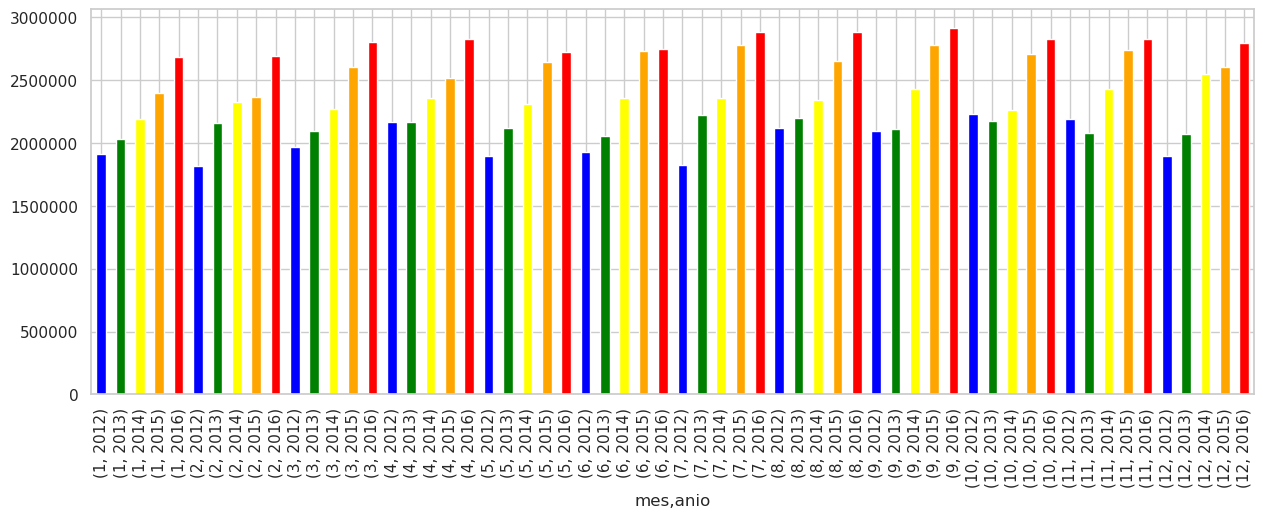

In [452]:
#df2.plot.bar(y = 'precio_promedio', figsize=(50,7), rot=0,title="Precio promedio por año")
#cada año deberia tener su color, conviene separarlo en varios graficos para facilitar la compresion
#df2.plot(kind='bar', figsize=(12,8), rot=90, title="Precio promedio",colors=['lawngreen','springgreen','gold','blue','red'])

colores=[]
for indice,fila in df2.iterrows():
    if indice[1]==2016:
        colores.append("red")
    if indice[1]==2015:
         colores.append("orange")
    if indice[1]==2014:
        colores.append("yellow")
    if indice[1]==2013:
        colores.append("green")
    if indice[1]==2012:
        colores.append("blue")
#df2["precio_promedio"].plot(kind="bar",color=colores,  figsize=(15,5))
df2["precio_promedio"].plot.bar(color=colores, figsize=(15,5));
#Sigue siendo feo a la vista, tal vez hay que separarlo en meses  df2.plot.barh(stacked=True);


En general los datos se mantienen, cada año tiene un promedio de precio mayor al anterior, salvo por algunas excepciones. En octubre  y noviembre del 2012 hubo un promedio mayor que en los mismos meses del 2013.  

### Analisis de propiedades por año

Vamos a analizar en que año hubo más propiedades a la venta de algún tipo en particular (casas, apartamentos, locales, etc) o de algún conjunto en particular (viviendas, industrias o locales comerciales)

In [453]:
#viviendas = ['Casa','Apartamento', 'Casa en condominio', 'Quinta Vacacional', 'Duplex','Casa uso de suelo','Departamento Compartido','Hospedaje']
df_viviendas = df.loc[df.tipodepropiedad.isin(viviendas)].groupby('anio')['precio'].agg(['size','mean'])
df_viviendas.columns = ['cantidad_de_propiedades','precio_promedio']
df_viviendas.sort_values('precio_promedio', ascending=False)

,cantidad_de_propiedades,precio_promedio
anio,,
2016,85515,"2,817,018.34"
2015,46841,"2,654,187.18"
2014,37107,"2,365,082.62"
2013,28094,"2,121,031.67"
2012,21678,"2,018,881.36"


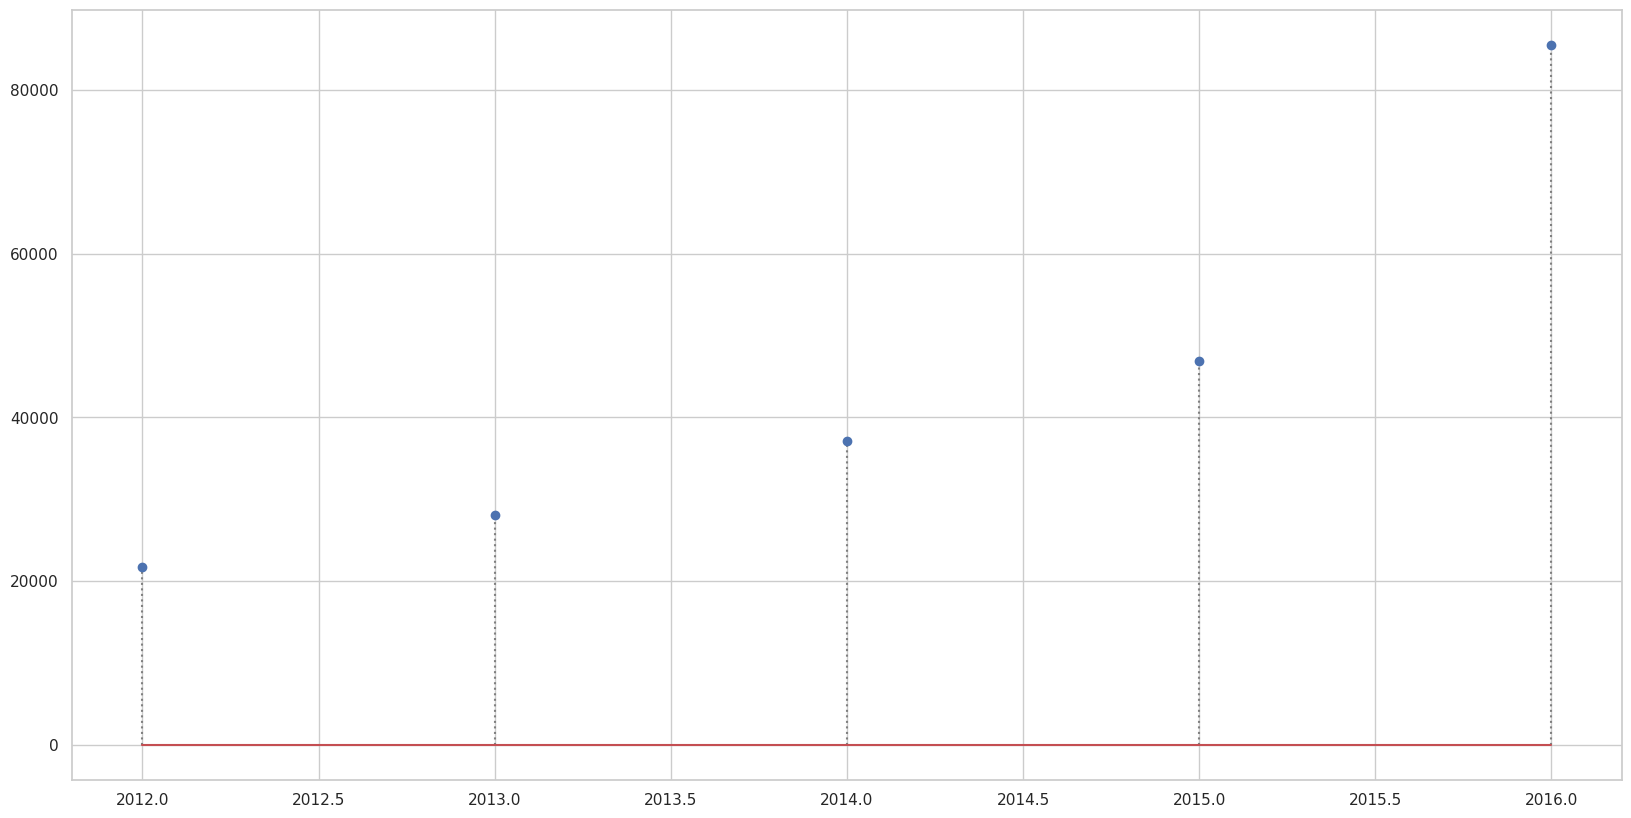

In [454]:
grafico = plt.stem(df_viviendas.index, df_viviendas["cantidad_de_propiedades"],linefmt=("grey",":"))
plt.show(grafico)
#df_viviendas.plot()

In [539]:
#Explicacion

In [540]:
#comercios = ['Local Comercial','Oficina comercial','Bodega comercial','Terreno comercial'] 
#Faltaría el "local en centro comercial"

df_comercios = df.loc[df.tipodepropiedad.isin(comercios)].groupby('anio')['precio']\
.agg(['size','mean'])

df_comercios.columns = ['cantidad_de_propiedades','precio_promedio']
df_comercios#.sort_values('precio_promedio', ascending=False)

,cantidad_de_propiedades,precio_promedio
anio,,
2012,524,"2,373,427.78"
2013,795,"2,259,732.38"
2014,1359,"2,483,577.99"
2015,1837,"2,580,757.85"
2016,3013,"2,859,607.17"


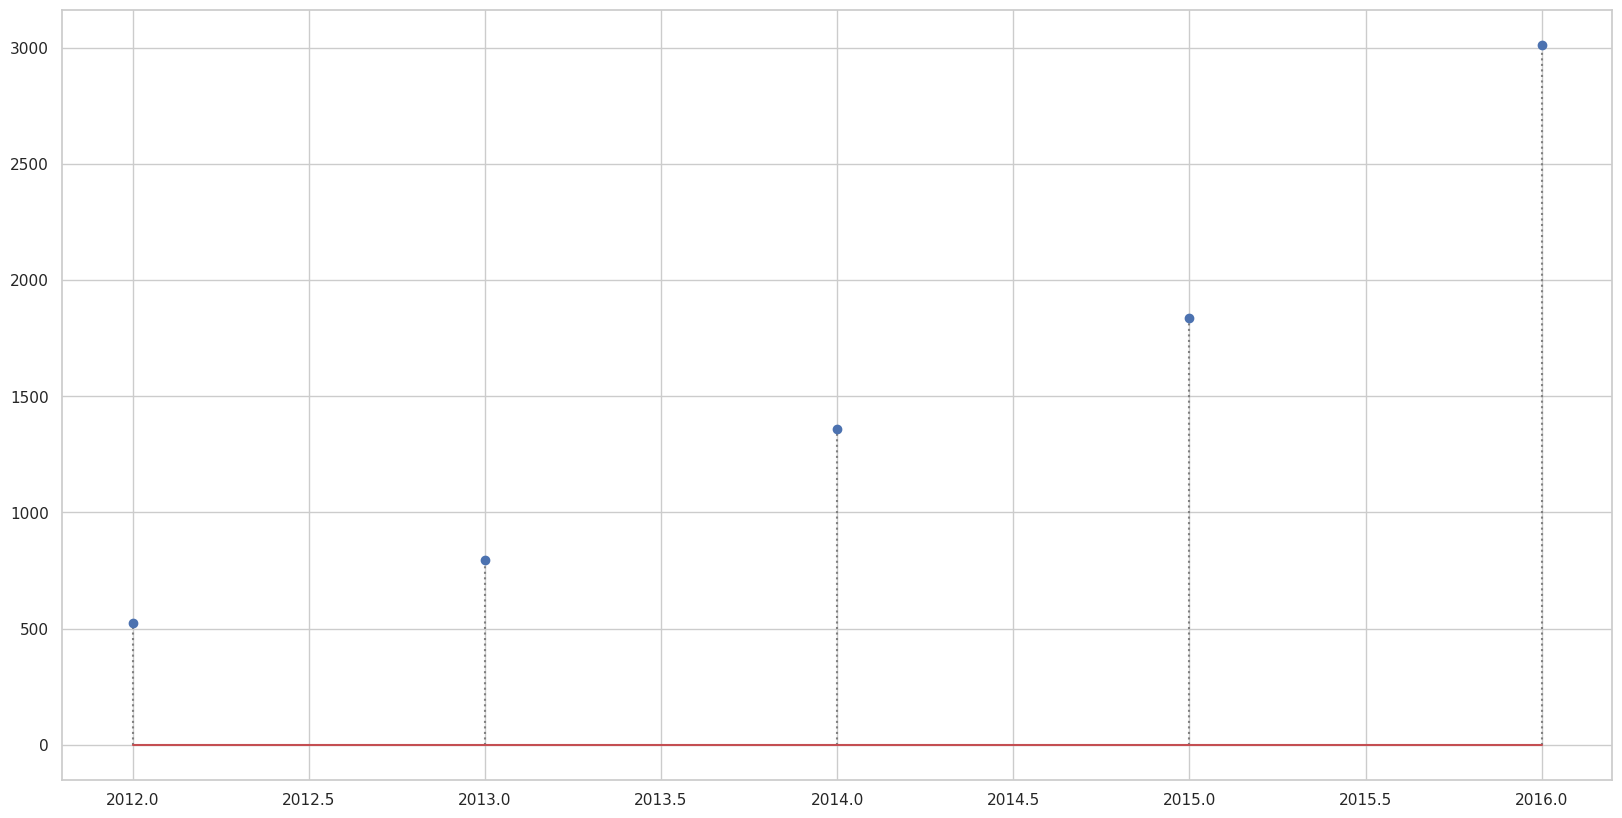

In [541]:
grafico = plt.stem(df_comercios.index, df_comercios["cantidad_de_propiedades"],linefmt=("grey",":"))
plt.show(grafico)

In [544]:
#Explicacion

In [545]:
#industrias = ['Inmuebles productivos urbanos', 'Nave industrial','Terreno industrial','Casa uso de suelo']

df_industrias = df.loc[df.tipodepropiedad.isin(industrias)].groupby('anio')['precio']\
.agg(['size','mean'])

df_industrias.columns = ['cantidad_de_propiedades','precio_promedio']
df_industrias#.sort_values('precio_promedio', ascending=False)

,cantidad_de_propiedades,precio_promedio
anio,,
2012,145,"3,453,189.38"
2013,134,"3,554,376.87"
2014,162,"3,843,414.56"
2015,195,"3,747,365.10"
2016,379,"3,847,913.85"


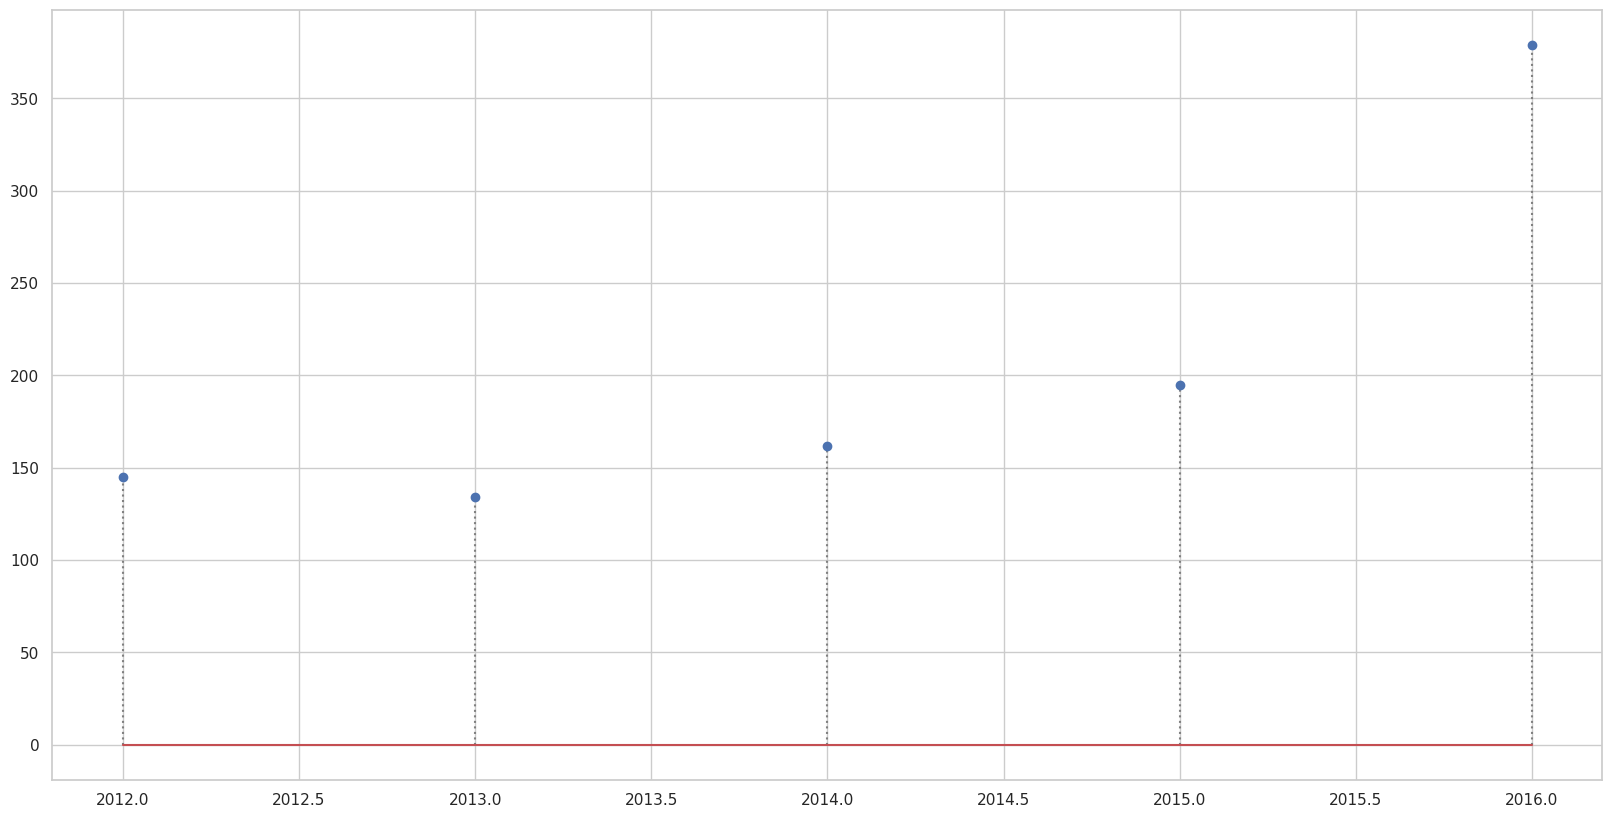

In [546]:
grafico = plt.stem(df_industrias.index, df_industrias["cantidad_de_propiedades"],linefmt=("grey",":"))
plt.show(grafico)

In [547]:
#Explicacion

## Analisis de latitud y longitud y como afecta al precio

Esto deberia estar mas arriba pero como no esta terminado, bue

In [459]:
#analisis de la latitud

lat_max=df.loc[:,'lat'].max()
lat_min=df.loc[:,'lat'].min()
print("latitud máxima: "+ str(lat_max))
print("latitud mínima: "+ str(lat_min))

latitud máxima: 83.02621885344844
latitud mínima: -100.886679


In [460]:
#analisis de longitud
long_min=df.loc[:,'lng'].min()
long_max=df.loc[:,'lng'].max()
print("Longitud minima: "+ str(long_min))
print("Longitud máxima: "+ str(long_max))

Longitud minima: -125.859375
Longitud máxima: 121.036


### Analisis de distribución de propiedades de acuerdo a su ubicación en latitud y longitud

Queremos saber cuántas propiedades se encuentran ubicadas en ciertos intervalos de latitud y longitud. Los valores de latitud tomados por las propiedades de la información provista se encuentran en el intervalo (-100.89 ; 83.03), los valores de longitud se encuentran en el intervalo (-125.56 ; 121.04). Dados estos intervalos, para facilitar la visualización de la información se decide agrupar la misma en segmentos de tamaño 10.

#### Distribución de propiedades

In [461]:
#análisis de cantidad de propiedades segun latitud y longitud
df_pos_lat_lng=df.groupby([pd.cut(df["lat"],np.arange(-110,100,10)),pd.cut(df['lng'],np.arange(-130,120,10))])
df_pos_lat_lng=df_pos_lat_lng.size()
df_pos_lat_lng=df_pos_lat_lng.reset_index(level=[0,1])
df_pos_lat_lng.columns=['latitud','longitud','cant de propiedades']
df_pos_lat_lng
#nota: HM==heatmap
HM_data1=pd.pivot_table(df_pos_lat_lng,values='cant de propiedades',index='longitud',columns='latitud')
sns.heatmap(HM_data1,cmap='inferno_r')

TypeError: cannot determine next label for type <class 'str'>

#### Distribución de propiedades que poseen piscina

Nos interesa saber donde se encuentran las propiedades que poseen piscinas, y en que cantidad estan presentes

In [ ]:
df_pis_lat_lng=df.groupby([pd.cut(df["lat"],np.arange(-110,100,10)),pd.cut(df['lng'],np.arange(-130,120,10)),df.loc[:,'piscina']==1.00])
df_pis_lat_lng=df_pis_lat_lng.size()
df_pis_lat_lng=df_pis_lat_lng.reset_index(level=[0,1])
df_pis_lat_lng=df_pis_lat_lng.reset_index(level=0)
  
#df_pis_lat_lng=df_pis_lat_lng.drop('piscina'==False)
df_pis_lat_lng.columns=['piscina','lat','lng','cantidad de propiedades con piscina']
#df_pis_lat_lng.columns
df_pis_lat_lng.loc[df_pis_lat_lng['piscina']==False,['cantidad de propiedades con piscina']]=0


#se hace el gráfico
HM_pis_data=pd.pivot_table(df_pis_lat_lng,values='cantidad de propiedades con piscina',index='lng',columns='lat')
sns.heatmap(HM_pis_data,cmap='inferno_r')

#### Distribución de propiedades que no poseen piscina

Sabiendo la cantidad de propiedades que poseen piscina, buscamos de que manera se agrupan las propiedades que no poseen piscina de acuerdo a su latitud y longitud

In [ ]:
df_pis_lat_lng=df.groupby([pd.cut(df["lat"],np.arange(-110,100,10)),pd.cut(df['lng'],np.arange(-130,120,10)),df.loc[:,'piscina']==0.00])
df_pis_lat_lng=df_pis_lat_lng.size()
df_pis_lat_lng=df_pis_lat_lng.reset_index(level=[0,1])
df_pis_lat_lng=df_pis_lat_lng.reset_index(level=0)
df_pis_lat_lng

df_pis_lat_lng.columns=['piscina','lat','lng','cantidad de propiedades sin piscina']
#df_pis_lat_lng.columns
#la siguiente linea de código es necesaria, porque al hacer groupby, en aquellos grupos que NO tienen datos
#el groupby genera filas llenas de NAN, que agregan 1 dato hacer .size()
#tengo que eliminar esos datos adicionales que generé
df_pis_lat_lng.loc[df_pis_lat_lng['piscina']==False,['cantidad de propiedades sin piscina']]=0
df_pis_lat_lng

#se hace el gráfico
HM_pis_data=pd.pivot_table(df_pis_lat_lng,values='cantidad de propiedades sin piscina',index='lng',columns='lat')
sns.heatmap(HM_pis_data,cmap='inferno_r')

#### Distribución de propiedades que poseen garage

In [ ]:
#hacemos un análisis para cantidad de propiedades que poseen garage
df_gar_lat_lng=df.groupby([pd.cut(df["lat"],np.arange(-110,100,10)),pd.cut(df['lng'],np.arange(-130,120,10)),df.loc[:,'garages']>0.00])
df_gar_lat_lng=df_gar_lat_lng.size()
df_gar_lat_lng=df_gar_lat_lng.reset_index(level=[0,1])
df_gar_lat_lng=df_gar_lat_lng.reset_index(level=0)
df_gar_lat_lng.columns=['garages','lat','lng','cantidad de propiedades con garages']
df_gar_lat_lng.loc[df_gar_lat_lng['garages']==False,['cantidad de propiedades con garages']]=0

#se hace el gráfico
HM_gar_lat_lng_data=pd.pivot_table(df_gar_lat_lng,values='cantidad de propiedades con garages',index='lng',columns='lat')
sns.heatmap(HM_gar_lat_lng_data,cmap='inferno_r')

#### Distribución de propiedades que poseen un solo garage

In [ ]:
#cantidad de propiedades que poseen un solo garage

df_gar_lat_lng=df.groupby([pd.cut(df["lat"],np.arange(-110,100,10)),pd.cut(df['lng'],np.arange(-130,120,10)),df.loc[:,'garages']==1.00])
df_gar_lat_lng=df_gar_lat_lng.size()
df_gar_lat_lng=df_gar_lat_lng.reset_index(level=[0,1])
df_gar_lat_lng=df_gar_lat_lng.reset_index(level=0)

df_gar_lat_lng.columns=['Cumple la condicion','latitud','longitud','cantidad de propiedades sin garage']
df_gar_lat_lng.loc[df_gar_lat_lng['Cumple la condicion']==False,['cantidad de propiedades sin garage']]=0
#se hace el gráfico
HM_gar_lat_lng_data=pd.pivot_table(df_gar_lat_lng,values='cantidad de propiedades sin garage',index='longitud',columns='latitud')
sns.heatmap(HM_gar_lat_lng_data,cmap='inferno_r')

#### Distribución de propiedades que poseen dos garages

In [ ]:
#cantidad de propiedades que poseen dos garages

df_gar_lat_lng=df.groupby([pd.cut(df["lat"],np.arange(-110,100,10)),pd.cut(df['lng'],np.arange(-130,120,10)),df.loc[:,'garages']==2.00])
df_gar_lat_lng=df_gar_lat_lng.size()
df_gar_lat_lng=df_gar_lat_lng.reset_index(level=[0,1])
df_gar_lat_lng=df_gar_lat_lng.reset_index(level=0)

df_gar_lat_lng.columns=['Cumple la condicion','latitud','longitud','cantidad de propiedades sin garage']
df_gar_lat_lng.loc[df_gar_lat_lng['Cumple la condicion']==False,['cantidad de propiedades sin garage']]=0
#se hace el gráfico
HM_gar_lat_lng_data=pd.pivot_table(df_gar_lat_lng,values='cantidad de propiedades sin garage',index='longitud',columns='latitud')
sns.heatmap(HM_gar_lat_lng_data,cmap='inferno_r')

#### Distribución de propiedades que poseen tres garages

In [ ]:
#cantidad de propiedades poseen tres garages

df_gar_lat_lng=df.groupby([pd.cut(df["lat"],np.arange(-110,100,10)),pd.cut(df['lng'],np.arange(-130,120,10)),df.loc[:,'garages']==3.00])
df_gar_lat_lng=df_gar_lat_lng.size()
df_gar_lat_lng=df_gar_lat_lng.reset_index(level=[0,1])
df_gar_lat_lng=df_gar_lat_lng.reset_index(level=0)

df_gar_lat_lng.columns=['Cumple la condicion','latitud','longitud','cantidad de propiedades sin garage']
df_gar_lat_lng.loc[df_gar_lat_lng['Cumple la condicion']==False,['cantidad de propiedades sin garage']]=0
#se hace el gráfico
HM_gar_lat_lng_data=pd.pivot_table(df_gar_lat_lng,values='cantidad de propiedades sin garage',index='longitud',columns='latitud')
sns.heatmap(HM_gar_lat_lng_data,cmap='inferno_r')

### Análisis de valor de propiedades en función de su valor de latitud y longitud

#### Valor promedio de una propiedad segun su valor de latitud

Se desea conocer cuál es el precio promedio de una propiedad que se encuentre ubicado en algun intervalo de latitud

Puede ocurrir que no haya información sobre propiedades en algunos intervalos de latitud. Esta situación se reflejara en la información mostrada, estando estos casos representados por un valor promedio de propiedad de cero

In [ ]:
#voy a tomar rangos 10 para los valores de latitud y longitud
#consegui el precio promedio por latitud
df_lat_precio_promedio=df.groupby(pd.cut(df["lat"],np.arange(-110,100,10))).agg({'precio':'mean'})

#me quedaron nans en aquellos rangos donde no hay propiedades. Se decide reemplazar esos valores por cero
df_lat_precio_promedio.fillna(0)
#notemos que precio cero == no hay propiedades en ese rango de latitudes
df_lat_precio_promedio.columns=['Precio promedio de la propiedad']
#hagamos el gráfico
df_lat_precio_promedio.plot(kind='bar',title='Precio promedio de una propiedad segun la latitud en la que se encuentre')

#### Valor promedio de una propiedad según su  valor de longitud

Se realiza el mismo análisis que se hizo para la latitud, pero en base a su valor de longitud. Nuevamente, para aquellos intervalos en donde no hay datos, se representarán con un precio promedio de cero 

In [ ]:
#se hace lo mismo para longitud
df_long_precio_promedio=df.groupby(pd.cut(df['lng'],np.arange(-130,130,10))).agg({'precio':'mean'})
#llenamos los nans nuevamente
df_long_precio_promedio=df_long_precio_promedio.fillna(0)
df_long_precio_promedio.plot(kind='bar',title='Precio promedio de una propiedad segun la longitud en la que se encuentre')

#### Valor promedio de una propiedad segun su valor de latitud y longitud

Ahora que se tiene los valores promedio para diversos rangos de latitud y longitud, buscamos tener información más detallada en base a estos valores. Para ello hacemos un análisis de los valores promedio de las propiedades, según en que valores de latitud y longitud se encuentre

In [ ]:
### y ahora hago una combinacion de ambos

df_precio_lat_lng=df.groupby([pd.cut(df["lat"],np.arange(-110,100,10)),pd.cut(df['lng'],np.arange(-130,120,10))]).agg({'precio':'mean'})
df_precio_lat_lng=df_precio_lat_lng.reset_index(level=[0,1])

heatmap_data=pd.pivot_table(df_precio_lat_lng,values='precio',index='lat',columns='lng')

sns.heatmap(heatmap_data,cmap='YlGnBu')

###  analisis de usos multiples







se analiza cuales valores puede tomar, y cuántos hay de cada uno

In [ ]:
df.loc[:,'usosmultiples'].value_counts()

se analiza cuales son las provincias que tienen la mayor cantidad de propiedades con uso múltiple

In [ ]:
#provincias que más propiedades con usos multiples tiene
provincias_mas_usosmultiples=df.groupby('provincia')
dicc_provincias_usosmultiples={}
dicc_provincias_sinusosmultiples={}

for provincia, fila in provincias_mas_usosmultiples:
    dicc_provincias_usosmultiples[provincia]=0
    dicc_provincias_sinusosmultiples[provincia]=0
    for tieneusosmultiples in fila.loc[:,'usosmultiples']:
        if tieneusosmultiples==0.00:
            dicc_provincias_sinusosmultiples[provincia]+=1
        else:
            dicc_provincias_usosmultiples[provincia]+=1
#esto es para mostrar la informacion
df_usosmultiples_porprovincia=pd.DataFrame(list(dicc_provincias_usosmultiples.items()))
df_usosmultiples_porprovincia.columns=['Provincia','propiedades con usos multiples']
df_usosmultiples_porprovincia=df_usosmultiples_porprovincia.sort_values('propiedades con usos multiples',ascending=False)

df_usosmultiples_porprovincia.head(5)

Vemos cuáles son las provincias que menos propiedades con usos múltiples tienen

In [ ]:
df_usosmultiples_porprovincia.tail(5)

De la misma manera vemos cuáles son las provincias que poseen la mayor cantidad de propiedades sin usos múltiples


In [ ]:
df_sinusosmultiples_porprovincia=pd.DataFrame(list(dicc_provincias_sinusosmultiples.items()))
df_sinusosmultiples_porprovincia.columns=['Provincia','propiedades sin usos multiples']
df_sinusosmultiples_porprovincia=df_sinusosmultiples_porprovincia.sort_values('propiedades sin usos multiples',ascending=False)
df_sinusosmultiples_porprovincia.head(5)

Las provincias con menor cantidad de propiedades sin usos múltiples son:

In [ ]:
df_sinusosmultiples_porprovincia.tail(5)

In [ ]:
***************************HASTA ACA LLEGUÉ****************************************

In [ ]:
df_garages=df.groupby(['provincia','habitaciones','garages']).agg({'precio':'mean'})
#esta hecha asi, a mano, porque no hay una implementacion para hacer join con multiindices

indicesProvincias=df_garages.index.get_level_values(0)
dicc={}

for provincia in indicesProvincias:
    df_garages_habitaciones=df_garages.loc[provincia]
    indicesHabitaciones=df_garages_habitaciones.index.get_level_values(0)
    for habitaciones in indicesHabitaciones:
        df_garages_garages=df_garages_habitaciones.loc[habitaciones]
        indicesGarages=df_garages_garages.index.values
        lista_precios=[]
        lista_indices_garages=[]
        for garages in indicesGarages:
            lista_precios.append(df_garages_garages.loc[garages])
            lista_indices_garages.append(garages)
        cantidadDeGarages=len(lista_precios)
        
        if cantidadDeGarages==1:
            dicc[(provincia,habitaciones,lista_indices_garages[0])]=0
        else:
            valorBase=float(lista_precios[0])
                                         #este va a ser el valor que uso para comparar. Por como esta ordenado el df
                                         #va a ser el valor correspondiente a la menor cantidad de garages en la combinacion
                                         #provincia,habitacion
            for x in range(1,cantidadDeGarages):
                valorAComparar=float(lista_precios[x])
                diferencia=float(abs(valorAComparar-valorBase))
                porcentajeVariacion=round(float((diferencia/valorBase)*100),2)
                dicc[(provincia,habitaciones,lista_indices_garages[x])]=porcentajeVariacion


In [ ]:
lista_cant_garages=list(df_muestra.loc[:,'garages'].value_counts().index)
lista_cant_garages.sort()

listaPromedios=[]

for x in range(0,len(lista_cant_garages)):
    serieAuxiliar=df_muestra[df_muestra.loc[:,'garages']==lista_cant_garages[x]]
    serieAuxiliar=serieAuxiliar.loc[:,'Variación del precio por garage en %']
    promedio=round(float(serieAuxiliar.apply('mean')))
    listaPromedios.append((lista_cant_garages[x],promedio))

df_resultado=pd.DataFrame(listaPromedios)
df_resultado.columns=['cantidad de garages','Variacion del precio por garage en %']
df_resultado

In [ ]:
df_muestra=pd.DataFrame(list(dicc.items()))
df_muestra.columns=['Provincia,habitaciones,garages','Variación del precio por garage en %']
df_muestra=df_muestra[df_muestra.loc[:,'Variación del precio por garage en %']!=0]

lista1=[]
lista2=[]
lista3=[]
lista4=[]
for provincia,habitaciones,garages in df_muestra.loc[:,'Provincia,habitaciones,garages']:
    lista1.append(provincia)
    lista2.append(habitaciones)
    lista3.append(garages)
for variacion in df_muestra.loc[:,'Variación del precio por garage en %']:
    lista4.append(variacion)
df_muestra=pd.DataFrame(list(zip(lista1,lista2,lista3,lista4)),columns=['Provincia','habitaciones','garages','Variación del precio por garage en %'])

df_muestra

In [ ]:
#aca se podria hacer una recta como gráfico. Hay 3 puntos que representan la variacion del precio de la propiedad 
#segun la cantidad de garages que posean comparado con una propiedad con caracteristicas similares pero sin garage
df_resultado.loc[3] = [0,0]
aux = df_resultado.set_index("cantidad de garages").sort_index()
aux.plot(kind = 'line', figsize = (10, 5), marker = 'o',color="green"

In [ ]:
df.nlargest(5, ['precio','metrostotales'])
#Curiosamente las 5 más caras pertenecen al distrito federal, con razón es la más cara


Veamos las 5 propiedades más caras y con más metros 

In [ ]:
#ciudades = df['ciudad']
#ciudades.value_counts()

In [ ]:
df.isnull().sum()
df.dropna(subset=['titulo','descripcion','tipodepropiedad','direccion','ciudad','provincia','antiguedad','habitaciones','garages','banos','metroscubiertos','metrostotales','idzona','lat','lng'])\
.isnull().sum() #elimino los nulos, habiamos discutido si lo hacemos o no

In [ ]:
df.memory_usage() #deriamos castear datos para que ocupen menos espacio

In [ ]:
#df.astype({'gimnasio': 'category','usosmultiples': 'category','piscina': 'category','escuelascercanas': 'int32','centroscomercialescercanos': 'int32'}).dtypes


In [ ]:
#df.dtypes

In [ ]:
df.info()
#deberiamos castear datos

In [ ]:
(df.memory_usage()/(1024*1024)).sum()

In [ ]:
df.describe()

In [ ]:
#df.plot.bar('habitaciones','precio') congela la computadora


#Hacer grafico


#print(f"Total tipos de propiedad: {df.tipodepropiedad.nunique()}")
#df.tipodepropiedad.value_counts().plot(kind='bar', figsize=(15, 5), rot=70,mtitle="Cantidad de propiedades por tipo de propiedad");

In [ ]:
df.groupby('precio').agg({'antiguedad':'sum'})
#no sirve para nada ojo!!!!
#el primero elemento tiene 1400 años de antiguedad, raro

In [ ]:
df3 = df.loc[df.antiguedad > 100.00]
#40233830
df3.head() #arriba aparece pero aca no, doble raro

In [ ]:
# agrupando usando multiples columnas
grouped = df.groupby(['provincia','ciudad'])\
    .agg({'habitaciones':['mean','sum'],'precio':'mean', 'antiguedad':'mean'}) #poner parametros mas
                                                            #interesantes que habitaciones y antiguedad
grouped

In [ ]:
df2 = df.loc[df.tipodepropiedad == 'Apartamento']
df2.info()

In [ ]:
df2.shape

In [ ]:
#relacion entre latitud y longitud con el precio

In [ ]:
#comparacion entre el precio de las casas y los departamentos

In [ ]:
#

In [ ]:
# analicemos distribución de avisos por tipo de trabajo
workday_announcements = sns.countplot(x='tipodepropiedad', data=df, order=df['tipodepropiedad'].value_counts().index, orient='v')
workday_announcements.set_xticklabels(workday_announcements.get_xticklabels(),rotation=45)
workday_announcements.set_xlabel("Tipo de propiedades", fontsize=20)
workday_announcements.set_ylabel("Cantidad de Propiedades", fontsize=20)
workday_announcements.set_title("Cantidad de propiedades segun su clase", fontsize=20)

#Es un buen comienzo(?)

In [ ]:
# analicemos distribución de avisos por seniority

#seniority_types = sns.countplot(x='ciudad', data=df, order=df['ciudad'].value_counts().index, orient='v')
#seniority_types.set_xticklabels(seniority_types.get_xticklabels(),rotation=45)
#seniority_types.set_xlabel("Ciudades", fontsize=20)
#seniority_types.set_ylabel("Cantidad de propiedades por ciudad", fontsize=20)
#seniority_types.set_title("Propiedades por ciudad", fontsize=20)

#Horrible

In [ ]:
# Correlacion entre precio y metros cubiertos: descripción gráfica
column = 'metroscubiertos'

# Scatter plot
df_sample = df.sample(frac=0.05).copy().dropna().sort_values(column)
df_sample.plot.scatter(x=column, y='precio', figsize=(15, 5), title="Correlación entre metros cubiertos y precio")
plt.ticklabel_format(style = 'plain')

# Best-fit lineal
x = df_sample[column]
y = df_sample['precio']
f = np.poly1d(np.polyfit(x, y, deg=1))  
plt.plot(x.unique(), f(x.unique()), c='r', linewidth=4);


In [ ]:
# comparacion de dos (o mas) campos con elementos faltantes
#funciones a usar:


#funcion para conseguir los numeros de las filas que tienen el campo especificado en la columna con un NaN
#devuelve una lista con las posiciones
#para que funcione bien, tiene que usar la clave por default del dataFrame. si se usa una clave compuesta
#o una clave que no sea enteros crecientes falla

def obtener_filas_con_Nan(df, nombreColumna):
    serie=df.loc[:,nombreColumna]
    serie=serie.isnull()
    lista_posiciones_nulas=[]
    contador=0
    for booleano in serie:
        if booleano is True:
            lista_posiciones_nulas.append(contador)
        contador+=1
    return lista_posiciones_nulas


def concatenarListasSinDuplicados(lista1,lista2):
    dicc={}
    for item in lista1:
        dicc[item]=1
    for item in lista2:
        dicc[item]=1
    return dicc.keys()

In [ ]:
lista_id_faltantes=obtener_filas_con_Nan(df,'id')
print(lista_id_faltantes)

###  analisis de usos multiples







se analiza cuales valores puede tomar, y cuántos hay de cada uno

In [ ]:
df.loc[:,'usosmultiples'].value_counts()

se analiza cuales son las provincias que tienen la mayor cantidad de propiedades con uso múltiple

In [ ]:
#provincias que más propiedades con usos multiples tiene
provincias_mas_usosmultiples=df.groupby('provincia')
dicc_provincias_usosmultiples={}
dicc_provincias_sinusosmultiples={}

for provincia, fila in provincias_mas_usosmultiples:
    dicc_provincias_usosmultiples[provincia]=0
    dicc_provincias_sinusosmultiples[provincia]=0
    for tieneusosmultiples in fila.loc[:,'usosmultiples']:
        if tieneusosmultiples==0.00:
            dicc_provincias_sinusosmultiples[provincia]+=1
        else:
            dicc_provincias_usosmultiples[provincia]+=1
#esto es para mostrar la informacion
df_usosmultiples_porprovincia=pd.DataFrame(list(dicc_provincias_usosmultiples.items()))
df_usosmultiples_porprovincia.columns=['Provincia','propiedades con usos multiples']
df_usosmultiples_porprovincia=df_usosmultiples_porprovincia.sort_values('propiedades con usos multiples',ascending=False)

df_usosmultiples_porprovincia.head(5)

Vemos cuáles son las provincias que menos propiedades con usos múltiples tienen

In [ ]:
df_usosmultiples_porprovincia.tail(5)

De la misma manera vemos cuáles son las provincias que poseen la mayor cantidad de propiedades sin usos múltiples


In [ ]:
df_sinusosmultiples_porprovincia=pd.DataFrame(list(dicc_provincias_sinusosmultiples.items()))
df_sinusosmultiples_porprovincia.columns=['Provincia','propiedades sin usos multiples']
df_sinusosmultiples_porprovincia=df_sinusosmultiples_porprovincia.sort_values('propiedades sin usos multiples',ascending=False)
df_sinusosmultiples_porprovincia.head(5)

Las provincias con menor cantidad de propiedades sin usos múltiples son:

In [ ]:
df_sinusosmultiples_porprovincia.tail(5)

## habiendo analizado la data, vemos como afecta la misma al precio de las propiedades

análisis de la variacion de precios en base a si la propiedad tiene o no usos multiples


In [ ]:
#comparación de los precios de las propiedades básados exclusivamente en si la propiedad tiene o no usos multiples
df_usosmultiples=df.groupby('usosmultiples').agg({'precio':['max','min','mean']})
df_usosmultiples.columns=['precio máximo','precio mínimo','precio promedio']
df_usosmultiples

In [ ]:
#comparacion de los precios promedios de propiedades con y sin usos múltiples, basado en la provincia
df_precio_usosmultiples_provincia=df.groupby(['usosmultiples','provincia']).agg({'precio':'mean'})
df_precio_usosmultiples_provincia.columns=['precio promedio']
df_precio_usosmultiples_provincia
#ahora falta plotear un grafico con estos valores

### Quiero ver cuáles son las provincias que tienen mayor precio para propiedades sin usos multiples

In [ ]:
provinciasMasCarasSinUsosMultiples=df_precio_usosmultiples_provincia.loc[0.0]
provinciasMasCarasSinUsosMultiples=provinciasMasCarasSinUsosMultiples.sort_values('precio promedio',ascending=False)
provinciasMasCarasSinUsosMultiples.columns=['precio promedio propiedad sin usos multiples']
provinciasMasCarasSinUsosMultiples.head(5)

### Quiero ver cuáles son las provincias que tienen menor precio para propiedades sin usos mutiples

In [ ]:
provinciasMasCarasSinUsosMultiples.tail(5)

### Queremos ver cuáles son las provincias que tienen mayor precio para propiedades con usos múltiples

In [ ]:
provinciasMasCarasConUsosMutiples=df_precio_usosmultiples_provincia.loc[1.00]
provinciasMasCarasConUsosMutiples=provinciasMasCarasConUsosMutiples.sort_values('precio promedio',ascending=False)
provinciasMasCarasConUsosMutiples.head(5)

### Queremos ver cuáles son las provincias que tienen menor precio para propiedades con usos múltiples


In [ ]:
provinciasMasCarasConUsosMutiples.tail(5)

### Efecto de usos multiples sobre el precio de propiedades de características similares

Queremos ver el efecto de si la propiedad tiene usos multiples en comparación con su precio, para propiedades de características similares. Para ello, se fija la propiedad y la cantidad de habitaciones, y se compara el promedio de los valores de ambos grupos (con uso multiple y sin uso multiple). Puede ocurrir que para alguna combinación de cantidad de habitaciones con ubicación, no se dispongan de datos suficientes para realizar la comparación. En tal caso la información obtenida reflejará esta situación, mostrando una variación del 0%


In [ ]:
df_variacion_precio_usos=df.groupby(['provincia','habitaciones','usosmultiples']).agg({'precio':'mean'})
df_variacion_precio_usos.index
indices_provincia=df_variacion_precio_usos.index.get_level_values(0)

#lo siguiente lo hice a mano, porque no esta implementada una forma de hacer join con multiindices en pandas

dicc={}

#consigo todas las provincias que se tienen que recorrer
indicesProvincias=df_variacion_precio_usos.index.get_level_values(0)
#recorro las provincias
for provincia in indicesProvincias:
    serieDentroDeProvincia=df_variacion_precio_usos.loc[provincia]
    indices_habitaciones=serieDentroDeProvincia.index.get_level_values(0)
    #recorro las habitaciones dentro de un grupo provincia específico
    for habitaciones in indices_habitaciones:
        serieDentroDeHabitaciones=serieDentroDeProvincia.loc[habitaciones]
        indices_usosMultiples=serieDentroDeHabitaciones.index.values
        lista_precios=[]
        for usosMultiples in indices_usosMultiples:
            lista_precios.append(serieDentroDeHabitaciones.loc[usosMultiples])
            
        #ahora que tengo todos los precios comparo 
        #si la longitud de la lista es igual a 1, significa que solamente habia un solo dato
        #para esas características
        
        if len(lista_precios)==1:
            dicc[(provincia,habitaciones)]=0
        else:
            #la comparación se hace respecto al precio sin uso multiple
            precioSinUso=float(lista_precios[0])
            precioConUso=float(lista_precios[1])
            diferencia=float(abs(precioSinUso-precioConUso))
            porcentajeVariacion=round(((diferencia/precioSinUso)*100),2)
            dicc[(provincia,habitaciones)]=porcentajeVariacion

            
#y ahora queda mostrar la info:
df_muestra=pd.DataFrame(list(dicc.items()))
df_muestra

Nos falta hacer:
Analisis precios por banios
Analisi precios por latitud y longitud (por ahi ultimo recurso)
Analisis de la cercania a escuelas/shoppings por cada provincia, ciudad
Comparacion de antiguedades para propiedades con las mismas caracteristicas


Analisis de datos:
-> por fecha de postulacion
-> por fechas 

-> por gimnasio
-> por ciudades
Faltan graficos de anàlisis anteriores
